<a href="https://colab.research.google.com/github/SShah276/patient-data-analysis/blob/main/patient_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from google.colab import files
uploaded = files.upload()

#Task 0
mat = loadmat('patient_data.mat')
data = mat['data']
heart_rate = data[0, :] # heart rate
pulse_rate = data[1, :] # pulse rate
respiration_rate = data[2, :] # resp. rate

time = np.arange(0, 30000, 1) # arrange time intervals

plt.figure(figsize=(15, 8)) # make graph bigger

plt.plot(time, heart_rate, color='r') # create plots from data
plt.plot(time, pulse_rate, color='g')
plt.plot(time, respiration_rate, color='b')

plt.xlabel("Time (seconds)") # label axes and title / legend
plt.ylabel("Signal Value")
plt.title("Physiological Signals Over Time")
plt.legend(['Heart Rate', 'Pulse Rate', 'Respiration Rate'])
plt.grid(True)

fig, graph = plt.subplots(3, 1, figsize=(12, 12)) # create three subplots

graph[0].plot(time, heart_rate, label="Heart Rate (HR)", linewidth=0.5, color='r') # create plots for each seperaet data set
graph[0].set_title("Heart Rate Over Time")
graph[0].set_xlabel("Time (seconds)")
graph[0].set_ylabel("Heart Rate (bpm)")
graph[0].grid(True)
graph[0].legend()


graph[1].plot(time, pulse_rate, label="Pulse Rate (PR)", linewidth=0.5, color='g')
graph[1].set_title("Pulse Rate Over Time")
graph[1].set_xlabel("Time (seconds)")
graph[1].set_ylabel("Pulse Rate (bpm)")
graph[1].grid(True)
graph[1].legend()


graph[2].plot(time, respiration_rate, label="Respiration Rate (RESP)", linewidth=0.5, color='b')
graph[2].set_title("Respiration Rate Over Time")
graph[2].set_xlabel("Time (seconds)")
graph[2].set_ylabel("Respiration Rate (breaths/min)")
graph[2].grid(True)
graph[2].legend()


plt.tight_layout() # space out graphs so they dont overlap

plt.show() # print all graphs

KeyboardInterrupt: 

In [ ]:
from scipy.stats import gaussian_kde, norm, probplot
#Task 1

from google.colab import files
uploaded = files.upload()

#1.1
#Sample size
#a)
sample_size = [70, 1000,30000]

#figure for sample size
for n in sample_size:
  if n == 30000:
    sample = respiration_rate[:n]
    floored = np.floor(sample)

    #CDF
    sort_sample = np.sort(sample)
    cdf_y = np.arange(1,n+1)/n

    #Plot all the functions.
    plt.suptitle(f"Respiration Rate Analysis for n = {n}")

    plt.figure(figsize=(8, 4))  # Adjust size to match previous subplot
    plt.subplot(2, 1, 2)  # Full-width bottom plot
    plt.plot(sort_sample, cdf_y, 'b-', label='Empirical CDF')
    plt.xlabel("Respiration Rate")
    plt.ylabel("CDF")
    plt.title("Empirical CDF of Respiration Rate (n = 30000)")
    plt.legend()
    plt.tight_layout()
    plt.show()
#b)
X = respiration_rate
Y = np.floor(X)
n = len(X)
#for Y
values_Y, counts_Y = np.unique(Y, return_counts=True)
pmf = counts_Y / n
pmf_min = np.min(pmf)
pmf_max = np.max(pmf)

#for X
values_X, counts_X = np.unique(X, return_counts=True)
pdf_approx = counts_X / n
pdf_approx_min = np.min(pdf_approx)
pdf_approx_max = np.max(pdf_approx)

#After gaussian estamation.
kde = gaussian_kde(X)
x_vals = np.linspace(min(X), max(X), 500)
pdf = kde(x_vals)
pdf_min = np.min(pdf)
pdf_max = np.max(pdf)

#print(f"PMF (floored) min: {pmf_min:.4f}, max: {pmf_max:.4f}")
#print(f"PDF (np.unique on X) min: {pdf_approx_min:.8f}, max: {pdf_approx_max:.8f}")
#print(f"PDF (KDE) min: {pdf_min:.8f}, max: {pdf_max:.8f}")


# Task 1.2: Normal Distribution Comparison for RESP

# (a) Calculate mean and standard deviation for 30K samples
resp_30k = respiration_rate[:30000]
mean_RESP = np.mean(resp_30k)
std_RESP = np.std(resp_30k)
#print("\nTask 1.2(a):")
#print("Mean of RESP (30K samples): {:.4f}".format(mean_RESP))
#print("Standard Deviation of RESP (30K samples): {:.4f}".format(std_RESP))

# (b) Generate a normally distributed random variable using np.random.normal
normal_samples = np.random.normal(mean_RESP, std_RESP, 30000)

#c)
def Imperical_range_cal(data,lower_bound, upper_bound):
  a = np.percentile(data, 2)
  b = np.percentile(data, 98)
  #print("\nTask 1.2(c): Normal distribution thresholds:")
 # print(f"Threshold a (lower {lower_bound}%) from data: {a:.4f}")
  #print(f"Threshold b (upper {upper_bound}%) from data: {b:.4f}")
  return a,b

a,b = Imperical_range_cal(respiration_rate,2,98)

# Estimated PDF and CDF for normal samples:
kde_normal = gaussian_kde(normal_samples)
x_norm = np.linspace(np.min(normal_samples), np.max(normal_samples), 200)
pdf_norm = kde_normal(x_norm)
sorted_normal = np.sort(normal_samples)
cdf_norm = np.arange(1, len(sorted_normal)+1) / len(sorted_normal)

plt.figure(figsize=(8, 4))  # Adjust size to match previous subplot
plt.subplot(2, 1, 2)  # Full-width bottom plot
plt.plot(sorted_normal, cdf_norm, 'c-', label='Normal CDF')
plt.xlabel('X')
plt.ylabel('CDF')
plt.title('Empirical CDF of Generated Normal Samples')
plt.legend()

plt.tight_layout()
plt.show()

# (c) Use scipy.stats.probplot to compare empirical RESP data (30K samples) with normal distribution

plt.figure(figsize=(8, 6))
probplot(resp_30k, dist="norm", sparams=(mean_RESP, std_RESP), plot=plt)
plt.title("Probability Plot (Q-Q Plot) for RESP vs Normal")
plt.show()

# (d) Write the equation for the Normal PDF and CDF and determine thresholds from the Normal distribution:
# Normal PDF:   f(x) = 1/(std * sqrt(2*pi)) * exp(-0.5*((x-mean)/std)^2)
# Normal CDF:   F(x) = 0.5*(1 + erf((x-mean)/(std*sqrt(2))))
a_normal = norm.ppf(0.02, loc=mean_RESP, scale=std_RESP)
b_normal = norm.ppf(0.98, loc=mean_RESP, scale=std_RESP)
print("\nTask 1.2(d): Normal distribution thresholds:")
print("Threshold a (lower 2%) from normal distribution: {:.4f}".format(a_normal))
print("Threshold b (upper 98%) from normal distribution: {:.4f}".format(b_normal))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ----- Helper Functions -----

def threshold_signal(signal, a, b):
    """
    Generate alarms for a 1D signal.
    Returns a binary array (1=alarm, 0=no alarm) where an alarm is raised
    if a sample is outside the interval [a, b].
    """
    # If sample < a or sample > b, alarm=1, else 0.
    alarms = np.where((signal < a) | (signal > b), 1, 0)
    return alarms

def coalesce_alarms(alarm_array, window=10):
    """
    Coalesce alarms over non-overlapping fixed-size windows.
    In each window, if at least one alarm is 1, output 1; otherwise 0.
    """
    n = len(alarm_array)
    num_windows = (n + window - 1) // window  # number of windows (last window may be shorter)
    coalesced = []
    for i in range(num_windows):
        start = i * window
        end = min(n, (i + 1) * window)
        if np.any(alarm_array[start:end] == 1):
            coalesced.append(1)
        else:
            coalesced.append(0)
    return np.array(coalesced)

def majority_vote(co_hr, co_pr, co_resp):
    """
    For each window, return 1 if at least 2 out of the 3 coalesced alarm signals are 1.
    """
    if not (len(co_hr) == len(co_pr) == len(co_resp)):
        raise ValueError("Coalesced alarm arrays must have the same length.")
    votes = []
    for x, y, z in zip(co_hr, co_pr, co_resp):
        votes.append(1 if (x + y + z) >= 2 else 0)
    return np.array(votes)

# ----- Task 2.1: Alarm Generation, Coalescing, and Voting -----

#Load samples
data = mat['data']
heart_rate = data[0, :] # heart rate
pulse_rate = data[1, :] # pulse rate
respiration_rate = data[2, :] # resp. rate

a_hr, b_hr = Imperical_range_cal(heart_rate, 2, 98)
a_pr, b_pr = Imperical_range_cal(pulse_rate, 2, 98)
a_resp, b_resp = Imperical_range_cal(respiration_rate, 2, 98)


# (a) Generate alarms for each signal using the empirical thresholds.
alarms_hr = threshold_signal(heart_rate, a_hr, b_hr)
alarms_pr = threshold_signal(pulse_rate, a_pr, b_pr)
alarms_resp = threshold_signal(respiration_rate, a_resp, b_resp)

# (b) Coalesce alarms over fixed 10-sample windows.
co_hr   = coalesce_alarms(alarms_hr, window=10)
co_pr   = coalesce_alarms(alarms_pr, window=10)
co_resp = coalesce_alarms(alarms_resp, window=10)

# (c) Apply a majority voter across the three sets of coalesced alarms.
voter_alarms = majority_vote(co_hr, co_pr, co_resp)

# (d) Plot the coalesced alarms and the majority voter output.
windows = np.arange(len(co_hr))
width = 0.2
plt.figure(figsize=(10, 6))
plt.bar(windows - 1.5*width, co_hr, width, label='HR Alarms')
plt.bar(windows - 0.5*width, co_pr, width, label='PR Alarms')
plt.bar(windows + 0.5*width, co_resp, width, label='RESP Alarms')
plt.bar(windows + 1.5*width, voter_alarms, width, label='Majority Vote')
plt.xlabel("10-sample window index")
plt.ylabel("Alarm (0 = No, 1 = Yes)")
plt.title("Coalesced Alarms and Voter Output")
plt.legend()
plt.show()

In [ ]:
#Task 2.2
#Load the goldent_alarms data
golden_alarms = mat['golden_alarms'].ravel()
#Let A = alarm, and GA = Golden alarm
#P(False Alarm) = P( A = 1| GA = 0) = P(A=1 and GA = 0)/ P(GA = 0)
#P(Miss Detection) = P( A = 0| GA = 1) = P(A=0 and GA = 1)/ P(GA = 1)
False_Alarm_and = 0
Miss_Dectection_and = 0
golden_alarms_count = 0
voter_alarms_count = 0
for i in range(len(golden_alarms)):
  if golden_alarms[i] == 1 :
    golden_alarms_count += 1

  if voter_alarms[i] == 1:
    voter_alarms_count += 1

  if golden_alarms[i] == 0 and voter_alarms[i]==1:
    False_Alarm_and+=1

  if voter_alarms[i] == 0 and golden_alarms[i] == 1:
    Miss_Dectection_and+=1

False_Alarm = (False_Alarm_and)/(len(golden_alarms)-golden_alarms_count) #Don't have to divide by lenth 3000 because we do it for numerator and denominator, so they cancel.
Miss_Dectection = (Miss_Dectection_and)/(golden_alarms_count)

print(f"P(False Alarm)    = {False_Alarm:.4f}")
print(f"P(Miss Detection) = {Miss_Dectection:.4f}")



In [ ]:
#P(error) is clear, we have everthing we need from part a.
P_error  = (False_Alarm_and + Miss_Dectection_and)/len(golden_alarms)
print(f"P(error) = {P_error:.4f}")

In [ ]:
# From 1.2 d: Threshold a (lower 2%) from normal distribution: 7.1516
#Threshold b (upper 98%) from normal distribution: 36.3320
#and the from 1.1c :
# From Task 1.1c (empirical thresholds)
print("Empirical thresholds from data (Task 1.1c):")
print(f"  Threshold a (lower 2%) from data: {a_resp:.4f}")
print(f"  Threshold b (upper 98%) from data: {b_resp:.4f}")
print()

# From Task 1.2d (normal-based thresholds)
print("Theoretical thresholds assuming normal distribution (Task 1.2d):")
print(f"  Threshold a (lower 2%) from normal dist.: 7.1516")
print(f"  Threshold b (upper 98%) from normal dist.: 36.3320")
#Now let's run Tasks 2.1 & 2.2 using Normal-Based Thresholds
z_low, z_high = norm.ppf(0.02), norm.ppf(0.98)

mu_hr, sd_hr = heart_rate.mean(),heart_rate.std()
mu_pr, sd_pr = pulse_rate.mean(),pulse_rate.std()
# RESP thresholds were already given in 1.2 d:
a_resp_n, b_resp_n = 7.1516, 36.3320
a_hr_n  = mu_hr + z_low  * sd_hr
b_hr_n  = mu_hr + z_high * sd_hr
a_pr_n  = mu_pr + z_low  * sd_pr
b_pr_n  = mu_pr + z_high * sd_pr

# Generate alarms
alarms_hr   = threshold_signal(heart_rate, a_hr_n, b_hr_n)
alarms_pr   = threshold_signal(pulse_rate, a_pr_n, b_pr_n)
alarms_resp = threshold_signal(respiration_rate, a_resp_n, b_resp_n)

# Coalesce
co_hr   = coalesce_alarms(alarms_hr,   window=10)
co_pr   = coalesce_alarms(alarms_pr,   window=10)
co_resp = coalesce_alarms(alarms_resp, window=10)

#Majority votor
voter_alarms = majority_vote(co_hr, co_pr, co_resp)

# Generate a new "simulated physician" label (based on looser thresholds or full-range detection)
golden_hr   = threshold_signal(heart_rate, a_hr - 5, b_hr + 5)
golden_pr   = threshold_signal(pulse_rate, a_pr - 5, b_pr + 5)
golden_resp = threshold_signal(respiration_rate, a_resp - 2, b_resp + 2)

# Coalesce golden alarms just like others
golden_hr   = coalesce_alarms(golden_hr, window=10)
golden_pr   = coalesce_alarms(golden_pr, window=10)
golden_resp = coalesce_alarms(golden_resp, window=10)

# New golden_alarms = "abnormality detected by physician" = any of the three out of range
golden_alarms = np.logical_or.reduce([golden_hr, golden_pr, golden_resp]).astype(int)


#Plot coalesced alarms and the majority voter output\'''

w_idx = np.arange(len(co_hr))
bw = 0.2
plt.figure(figsize=(10, 6))
plt.bar(w_idx - 1.5*bw, co_hr,   bw, label='HR Alarms (Normal)')
plt.bar(w_idx - 0.5*bw, co_pr,   bw, label='PR Alarms (Normal)')
plt.bar(w_idx + 0.5*bw, co_resp, bw, label='RESP Alarms (Normal)')
plt.bar(w_idx + 1.5*bw, voter_alarms, bw, label='Majority Vote')
plt.xlabel("10‑sample window index")
plt.ylabel("Alarm (0 = No, 1 = Yes)")
plt.title("Coalesced Alarms & Majority Vote  (All Normal‑Based Thresholds)")
plt.legend()
plt.tight_layout()
plt.show()

#Performance metrics
G0, G1 = golden_alarms == 0, golden_alarms == 1
V1, V0 = voter_alarms  == 1, voter_alarms  == 0

false_alarms     = np.sum(V1 & G0)
miss_detections  = np.sum(V0 & G1)
error_count      = np.sum(voter_alarms != golden_alarms)

P_FA  = false_alarms    / np.sum(G0)  if np.sum(G0) > 0 else 0
P_MD  = miss_detections / np.sum(G1)  if np.sum(G1) > 0 else 0
P_ERR = error_count     / len(golden_alarms)

print("\n Results with All Normal‑Based Thresholds")
print(f"HR  thresholds: a = {a_hr_n:.4f},  b = {b_hr_n:.4f}")
print(f"PR  thresholds: a = {a_pr_n:.4f},  b = {b_pr_n:.4f}")
print(f"RESP thresholds: a = {a_resp_n:.4f}, b = {b_resp_n:.4f}\n")

print("Emprical:")
print(f"\nP(False Alarm)    = {False_Alarm:.4f}")
print(f"P(Miss Detection) = {Miss_Dectection:.4f}")
print(f"P(error)          = {P_error:.4f}")
print("\nTheoretical:")
print(f"\nP(False Alarm)    = {P_FA:.4f}")
print(f"P(Miss Detection) = {P_MD:.4f}")
print(f"P(Error)          = {P_ERR:.4f}")




1. Switching to normal‑based thresholds immediately cut the false‑alarm rate in half. Because the limits are placed farther from the mean under a bell‑curve assumption, ordinary healthy samples rarely cross them, so the system stops flagging so many harmless events.

2. That same shift almost doubled the miss‑detection rate. By pushing the boundaries deeper into the tails, the normal model also lets more genuine abnormalities slip through without an alarm, showing the cost of assuming a perfectly symmetric distribution when the real data are a bit skewed.

3. Overall error changed only a little, reminding me that the better method depends on which mistake hurts more. If a missed abnormality is critical, empirical cut‑offs are safer; if nuisance alarms are the bigger problem, the normal cut‑offs can be worth the added risk.


# Task 3

In [ ]:
import os
import numpy as np
import scipy.io as sio
from scipy.io import loadmat


from google.colab import drive
drive.mount('/content/drive')
# Path to the folder containing the patient .mat files
data_dir = '/content/drive/MyDrive/ECE313'

# List of .mat files in the directory
mat_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.mat')])

# Initialize lists to store data for each patient
arr_train_data = []
arr_test_data = []
arr_train_labels = []
arr_test_labels = []

for file in mat_files:
    file_path = os.path.join(data_dir, file)

    # Load .mat file
    data = loadmat(file_path)
    all_data = np.floor(data['all_data']).astype(int)  # Discretize features
    all_labels = data['all_labels'].flatten()          # Convert to 1D array

    # Get number of samples
    num_samples = all_data.shape[1]
    split_idx = int(2 * num_samples / 3)

    # Split data into training and testing sets
    train_data = all_data[:, :split_idx]
    test_data = all_data[:, split_idx:]
    train_labels = all_labels[:split_idx]
    test_labels = all_labels[split_idx:]

    # Save to lists
    arr_train_data.append(train_data)
    arr_test_data.append(test_data)
    arr_train_labels.append(train_labels)
    arr_test_labels.append(test_labels)


#================
# TASK 3.1 (a)
#================

# For each patient:
for i in range(len(arr_train_labels)):
      train_labels = arr_train_labels[i]

      # Count occurrences of each hypothesis
      count_H1 = np.sum(train_labels == 1)  # Abnormal (alarm)
      count_H0 = np.sum(train_labels == 0)  # Normal (no alarm)
      total = len(train_labels)

      # Calculate prior probabilities
      P_H1 = count_H1 / total
      P_H0 = count_H0 / total

      print(f"Patient {i+1}:")
      print(f"P(H0): {P_H0:.4f}")
      print(f"P(H1): {P_H1:.4f}")

#================
# TASK 3.1 (b) - Likelihood Matrices P(X|H0) & P(X|H1)
#================

#print("\n\n===== LIKELIHOOD MATRICES =====")
for patient_idx in range(len(arr_train_data)):
    train_data = arr_train_data[patient_idx]  # Shape: (7 features, N samples)
    train_labels = arr_train_labels[patient_idx]

    # Separate normal (H0) and abnormal (H1) samples
    normal_samples = train_data[:, train_labels == 0]
    abnormal_samples = train_data[:, train_labels == 1]

    #print(f"\nPatient {patient_idx + 1}:")

    # Initialize list to store likelihood matrices (one per feature)
    likelihood_matrices = []

    for feature_idx in range(7):  # For each feature (0 to 6)
        # Get all possible discrete values for this feature
        min_val = np.min(train_data[feature_idx, :])
        max_val = np.max(train_data[feature_idx, :])
        possible_values = np.arange(min_val, max_val + 1)

        # Initialize likelihood matrix (2 rows: H0 & H1, columns: possible values)
        likelihood_matrix = np.zeros((2, len(possible_values)))

        # Compute P(X|H0) = Probability of feature value given NORMAL condition
        normal_counts = np.bincount(
            normal_samples[feature_idx, :] - min_val,  # Shift to 0-based index
            minlength=len(possible_values)
        )
        likelihood_matrix[0, :] = (normal_counts + 1e-10) / (normal_counts.sum() + 1e-10)  # Laplace smoothing

        # Compute P(X|H1) = Probability of feature value given ABNORMAL condition
        abnormal_counts = np.bincount(
            abnormal_samples[feature_idx, :] - min_val,
            minlength=len(possible_values)
        )
        likelihood_matrix[1, :] = (abnormal_counts + 1e-10) / (abnormal_counts.sum() + 1e-10)

    likelihood_matrices.append(likelihood_matrix)

        # Print likelihood matrix for this feature
    print(f"\nFeature {feature_idx + 1}:")
    #print("Possible values:", possible_values)
    print("P(X|H0):", np.round(likelihood_matrix[0], 4))
    print("P(X|H1):", np.round(likelihood_matrix[1], 4))


#================
# TASK 3.1 (c)
#================

# Settings for all plots
for patient_idx in range(9):  # For all 9 patients
    train_data = arr_train_data[patient_idx]
    train_labels = arr_train_labels[patient_idx]

    # Separate normal (H0) and abnormal (H1) samples
    normal_samples = train_data[:, train_labels == 0]
    abnormal_samples = train_data[:, train_labels == 1]

    # Create figure with 7 subplots
    fig, axs = plt.subplots(4, 2, figsize=(15, 18))
    fig.suptitle(f'Conditional PMFs for Patient {patient_idx + 1}', fontsize=16, y=1.02)

    # Flatten the axis array for easy iteration
    axs = axs.flatten()

    for feature_idx in range(7):
        ax = axs[feature_idx]

        # Get all possible discrete values for this feature
        min_val = np.min(train_data[feature_idx, :])
        max_val = np.max(train_data[feature_idx, :])
        possible_values = np.arange(min_val, max_val + 1)
        num_values = len(possible_values)

        # Compute probabilities
        counts_H0 = np.bincount(normal_samples[feature_idx, :] - min_val,
                               minlength=num_values)
        counts_H1 = np.bincount(abnormal_samples[feature_idx, :] - min_val,
                               minlength=num_values)
        prob_H0 = (counts_H0 + 1e-10) / (counts_H0.sum() + 1e-10)
        prob_H1 = (counts_H1 + 1e-10) / (counts_H1.sum() + 1e-10)

        # Dynamic plotting parameters
        bar_width = 0.35 if num_values <= 15 else 0.2
        bar_positions = np.arange(num_values)

        # Plot bars
        bars_H0 = ax.bar(bar_positions - bar_width/2, prob_H0, bar_width,
                        alpha=0.7, label='P(X|H0)', color='tab:blue')
        bars_H1 = ax.bar(bar_positions + bar_width/2, prob_H1, bar_width,
                        alpha=0.7, label='P(X|H1)', color='tab:red')

        # Customize subplot
        ax.set_title(f'Feature {feature_idx + 1}', pad=10)
        ax.set_xlabel('Value', labelpad=5)
        ax.set_ylabel('Probability', labelpad=5)

        # X-axis tick management
        if num_values > 15:
            step = max(1, num_values // 10)
            ax.set_xticks(bar_positions[::step])
            ax.set_xticklabels(possible_values[::step], rotation=45, ha='right')
        else:
            ax.set_xticks(bar_positions)
            ax.set_xticklabels(possible_values)

        ax.grid(True, alpha=0.3)
        ax.legend()

        # Add value labels if space permits
        if num_values <= 10:
            for bars in [bars_H0, bars_H1]:
                for bar in bars:
                    height = bar.get_height()
                    if height > 0.05:
                        ax.text(bar.get_x() + bar.get_width()/2., height,
                                f'{height:.2f}', ha='center', va='bottom',
                                fontsize=8)

    # Remove the empty subplot (8th position)
    fig.delaxes(axs[7])

    # Adjust layout and save
    plt.tight_layout()
    #plt.show()

#================
# TASK 3.1 (d)
#================

ml_decision_rules = []
map_decision_rules = []

for patient_idx in range(len(arr_train_data)):
    train_data = arr_train_data[patient_idx]
    train_labels = arr_train_labels[patient_idx]

    # Calculate prior probabilities for this patient
    count_H1 = np.sum(train_labels == 1)
    count_H0 = np.sum(train_labels == 0)
    P_H1 = count_H1 / len(train_labels)
    P_H0 = count_H0 / len(train_labels)

    # Separate normal (H0) and abnormal (H1) samples
    normal_samples = train_data[:, train_labels == 0]
    abnormal_samples = train_data[:, train_labels == 1]

    # Initialize decision rule vectors for all features (7 features)
    patient_ml_vector = np.zeros(7)
    patient_map_vector = np.zeros(7)

    for feature_idx in range(7):
        # Get all possible discrete values for this feature
        min_val = np.min(train_data[feature_idx, :])
        max_val = np.max(train_data[feature_idx, :])
        possible_values = np.arange(min_val, max_val + 1)

        # Compute P(X|H0) and P(X|H1) with Laplace smoothing
        counts_H0 = np.bincount(normal_samples[feature_idx, :] - min_val,
                              minlength=len(possible_values))
        counts_H1 = np.bincount(abnormal_samples[feature_idx, :] - min_val,
                              minlength=len(possible_values))

        P_X_given_H0 = (counts_H0 + 1e-10) / (counts_H0.sum() + 1e-10)
        P_X_given_H1 = (counts_H1 + 1e-10) / (counts_H1.sum() + 1e-10)

        # ML Decision Rule: Compare P(X|H1) vs P(X|H0)
        # If P(X|H1) ≥ P(X|H0), choose H1 (break ties in favor of H1)
        ml_comparison = P_X_given_H1 >= P_X_given_H0
        patient_ml_vector[feature_idx] = np.mean(ml_comparison)  # Fraction of values where H1 is chosen

        # MAP Decision Rule: Compare P(H1|X) vs P(H0|X)
        # Which is equivalent to comparing P(X|H1)P(H1) vs P(X|H0)P(H0)
        map_comparison = (P_X_given_H1 * P_H1) >= (P_X_given_H0 * P_H0)
        patient_map_vector[feature_idx] = np.mean(map_comparison)  # Fraction of values where H1 is chosen

    ml_decision_rules.append(patient_ml_vector)
    map_decision_rules.append(patient_map_vector)

    # Print results for the current patient
    print(f"\nPatient {patient_idx + 1}:")
    print("ML Decision Rule Vector (fraction of values choosing H1):")
    print(np.round(patient_ml_vector, 4))
    print("MAP Decision Rule Vector (fraction of values choosing H1):")
    print(np.round(patient_map_vector, 4))

# Convert to numpy arrays for easier analysis
ml_decision_rules = np.array(ml_decision_rules)
map_decision_rules = np.array(map_decision_rules)

# Print results for the current patient
print(f"\nPatient {patient_idx + 1}:")
print("ML Decision Rule Vector (fraction of values choosing H1):")
print(np.round(patient_ml_vector, 4))
print("MAP Decision Rule Vector (fraction of values choosing H1):")
print(np.round(patient_map_vector, 4))


#================
# TASK 3.1 (e)
#================

HT_table_array = [[None for _ in range(7)] for _ in range(9)]

for patient_idx in range(9):  # For all 9 patients
    train_data = arr_train_data[patient_idx]
    train_labels = arr_train_labels[patient_idx]

    # Calculate prior probabilities
    count_H1 = np.sum(train_labels == 1)
    count_H0 = np.sum(train_labels == 0)
    P_H1 = count_H1 / len(train_labels)
    P_H0 = count_H0 / len(train_labels)

    # Separate normal (H0) and abnormal (H1) samples
    normal_samples = train_data[:, train_labels == 0]
    abnormal_samples = train_data[:, train_labels == 1]

    for feature_idx in range(7):  # For each feature
        # Get all possible discrete values
        min_val = np.min(train_data[feature_idx, :])
        max_val = np.max(train_data[feature_idx, :])
        possible_values = np.arange(min_val, max_val + 1)

        # Compute counts
        counts_H0 = np.bincount(normal_samples[feature_idx, :] - min_val,
                              minlength=len(possible_values))
        counts_H1 = np.bincount(abnormal_samples[feature_idx, :] - min_val,
                              minlength=len(possible_values))

        # Compute probabilities with Laplace smoothing
        P_X_given_H0 = (counts_H0 + 1e-10) / (counts_H0.sum() + 1e-10)
        P_X_given_H1 = (counts_H1 + 1e-10) / (counts_H1.sum() + 1e-10)

        # Create the 2D array for this feature
        # Format: [possible_values, P(X|H0), P(X|H1)]
        HT_table = np.column_stack((
            possible_values.reshape(-1, 1),
            P_X_given_H0.reshape(-1, 1),
            P_X_given_H1.reshape(-1, 1)
        ))

        # Store in the cell array
        HT_table_array[patient_idx][feature_idx] = HT_table


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#================
# TASK 3.2 (a)
#================

# Initialize lists to store alarms for all patients
ml_alarms = []
map_alarms = []

for patient_idx in range(9):  # For each patient
    test_data = arr_test_data[patient_idx]
    test_labels = arr_test_labels[patient_idx]
    num_samples = test_data.shape[1]

    # Get prior probabilities (from training)
    train_labels = arr_train_labels[patient_idx]
    P_H1_train = np.mean(train_labels == 1)
    P_H0_train = np.mean(train_labels == 0)

    # Initialize alarm vectors for this patient
    patient_ml_alarms = np.zeros(num_samples)
    patient_map_alarms = np.zeros(num_samples)

    for t in range(num_samples):  # For each test sample
        # Initialize log-likelihoods
        log_P_X_H0 = 0
        log_P_X_H1 = 0

        for feature_idx in range(7):  # For each feature
            # Get the test value
            test_value = test_data[feature_idx, t]

            # Look up probabilities from HT_table_array
            feature_table = HT_table_array[patient_idx][feature_idx]
            values = feature_table[:, 0]

            # Find closest value (in case of interpolation needed)
            idx = np.argmin(np.abs(values - test_value))
            P_X_H0 = feature_table[idx, 1]
            P_X_H1 = feature_table[idx, 2]

            # Accumulate log-likelihoods (using log to avoid underflow)
            log_P_X_H0 += np.log(P_X_H0 + 1e-10)
            log_P_X_H1 += np.log(P_X_H1 + 1e-10)

        # ML Decision Rule
        if np.exp(log_P_X_H1) >= np.exp(log_P_X_H0):
            patient_ml_alarms[t] = 1

        # MAP Decision Rule
        if np.exp(log_P_X_H1) * P_H1_train >= np.exp(log_P_X_H0) * P_H0_train:
            patient_map_alarms[t] = 1

    ml_alarms.append(patient_ml_alarms)
    map_alarms.append(patient_map_alarms)

#================
# TASK 3.2 (b)
#================

# Evaluation function
def evaluate_alarms(true_labels, pred_alarms):
    tp = np.sum((true_labels == 1) & (pred_alarms == 1))
    fp = np.sum((true_labels == 0) & (pred_alarms == 1))
    tn = np.sum((true_labels == 0) & (pred_alarms == 0))
    fn = np.sum((true_labels == 1) & (pred_alarms == 0))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    return accuracy, precision, recall

# Evaluate performance
print("Test Set Performance:")
print("Patient | ML Accuracy | MAP Accuracy")
print("="*90)
for p in range(9):
    ml_acc, ml_prec, ml_rec = evaluate_alarms(arr_test_labels[p], ml_alarms[p])
    map_acc, map_prec, map_rec = evaluate_alarms(arr_test_labels[p], map_alarms[p])
    print(f"{p+1:7} | {ml_acc:.4f}      | {map_acc:.4f}")

# Initialize the 9x7 Error_table_array
Error_table_array = [[None for _ in range(7)] for _ in range(9)]

# Calculate error metrics for each patient and feature
for patient_idx in range(9):
    test_data = arr_test_data[patient_idx]
    test_labels = arr_test_labels[patient_idx]

    # Get prior probabilities from training
    train_labels = arr_train_labels[patient_idx]
    P_H1_train = np.mean(train_labels == 1)
    P_H0_train = np.mean(train_labels == 0)

    for feature_idx in range(7):
        # Initialize counters
        ml_fp, ml_fn = 0, 0
        map_fp, map_fn = 0, 0
        total_normal = 0
        total_abnormal = 0

        for t in range(test_data.shape[1]):  # For each test sample
            true_label = test_labels[t]
            test_value = test_data[feature_idx, t]

            # Get probabilities from HT_table_array
            feature_table = HT_table_array[patient_idx][feature_idx]
            values = feature_table[:, 0]
            idx = np.argmin(np.abs(values - test_value))
            P_X_H0 = feature_table[idx, 1]
            P_X_H1 = feature_table[idx, 2]

            # ML Decision
            ml_decision = 1 if P_X_H1 >= P_X_H0 else 0
            # MAP Decision
            map_decision = 1 if (P_X_H1 * P_H1_train) >= (P_X_H0 * P_H0_train) else 0

            # Count errors
            if true_label == 0:  # Normal case
                total_normal += 1
                if ml_decision == 1:
                    ml_fp += 1
                if map_decision == 1:
                    map_fp += 1
            else:  # Abnormal case
                total_abnormal += 1
                if ml_decision == 0:
                    ml_fn += 1
                if map_decision == 0:
                    map_fn += 1

        # Calculate probabilities (with protection against division by zero)
        ml_fa = ml_fp / total_normal if total_normal > 0 else 0
        ml_md = ml_fn / total_abnormal if total_abnormal > 0 else 0
        ml_err = (ml_fp + ml_fn) / (total_normal + total_abnormal)

        map_fa = map_fp / total_normal if total_normal > 0 else 0
        map_md = map_fn / total_abnormal if total_abnormal > 0 else 0
        map_err = (map_fp + map_fn) / (total_normal + total_abnormal)

        # Create 2x3 array for this feature
        error_matrix = np.array([
            [ml_fa, ml_md, ml_err],    # ML Rule row
            [map_fa, map_md, map_err]   # MAP Rule row
        ])

        # Store in cell array
        Error_table_array[patient_idx][feature_idx] = error_matrix

Test Set Performance:
Patient | ML Accuracy | MAP Accuracy
      1 | 0.9805      | 0.9853
      2 | 0.9695      | 0.9759
      3 | 0.9986      | 0.9986
      4 | 0.9970      | 0.9970
      5 | 0.9979      | 0.9979
      6 | 0.9333      | 0.9551
      7 | 0.9518      | 0.9742
      8 | 0.9802      | 0.9802
      9 | 0.9333      | 0.9551


Total feature pairs: 21

Patient 1 Best ML Pair: Features (0, 1) (Error: 0.0548)
Patient 1 Best MAP Pair: Features (0, 1) (Error: 0.0199)

Patient 2 Best ML Pair: Features (1, 3) (Error: 0.1233)
Patient 2 Best MAP Pair: Features (3, 4) (Error: 0.0153)

Patient 3 Best ML Pair: Features (1, 3) (Error: 0.0007)
Patient 3 Best MAP Pair: Features (1, 3) (Error: 0.0007)

Patient 4 Best ML Pair: Features (1, 4) (Error: 0.0005)
Patient 4 Best MAP Pair: Features (1, 4) (Error: 0.0010)

Patient 5 Best ML Pair: Features (1, 3) (Error: 0.0014)
Patient 5 Best MAP Pair: Features (1, 3) (Error: 0.0003)

Patient 6 Best ML Pair: Features (3, 4) (Error: 0.1285)
Patient 6 Best MAP Pair: Features (0, 3) (Error: 0.0186)

Patient 7 Best ML Pair: Features (1, 3) (Error: 0.1225)
Patient 7 Best MAP Pair: Features (1, 3) (Error: 0.0129)

Patient 8 Best ML Pair: Features (1, 3) (Error: 0.0064)
Patient 8 Best MAP Pair: Features (1, 3) (Error: 0.0028)

Patient 9 Best ML Pair: Features (3, 4) (Error: 0.1285)
Patient

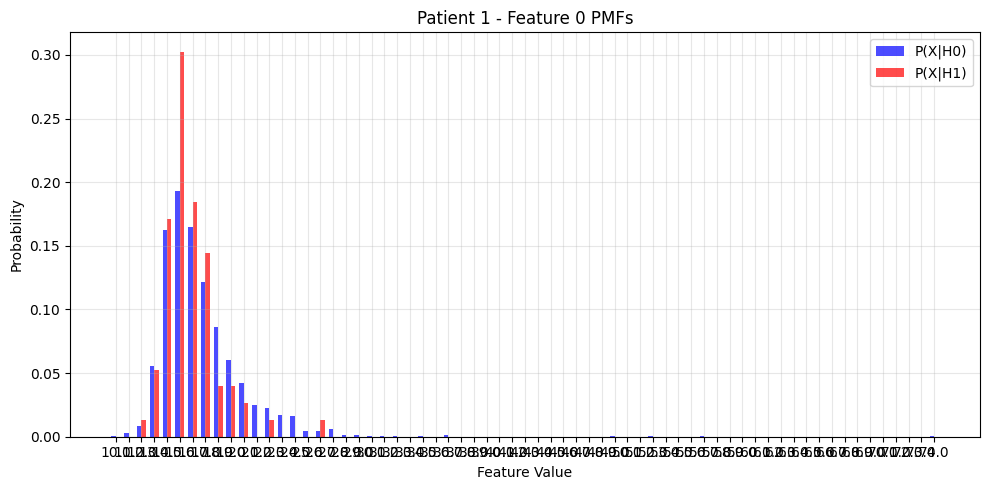

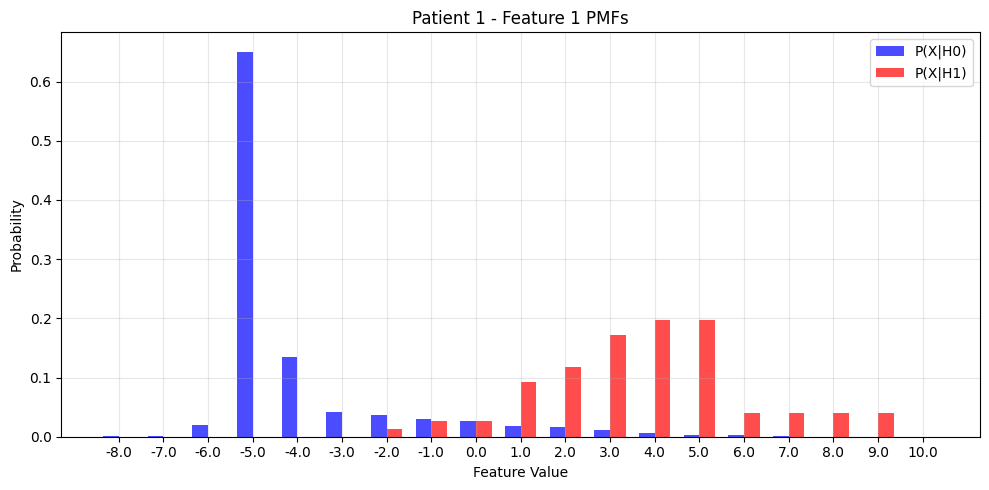

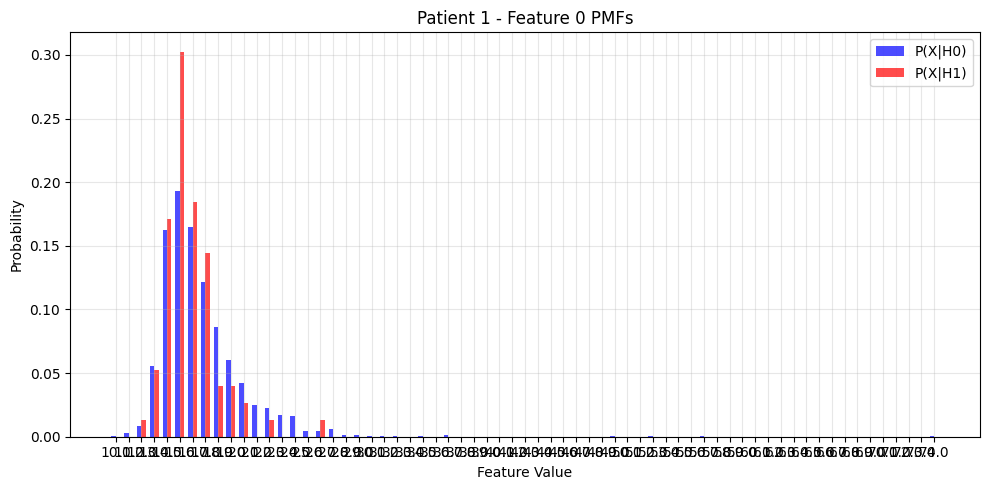

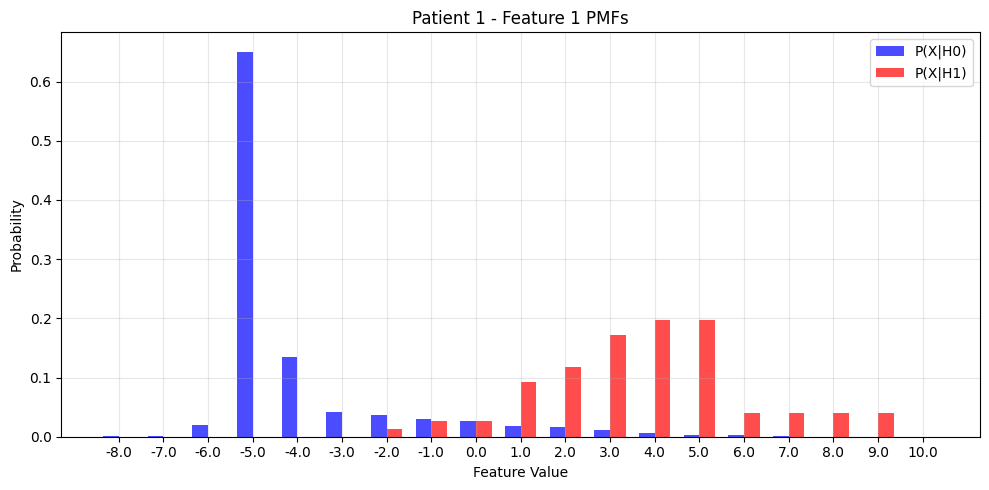

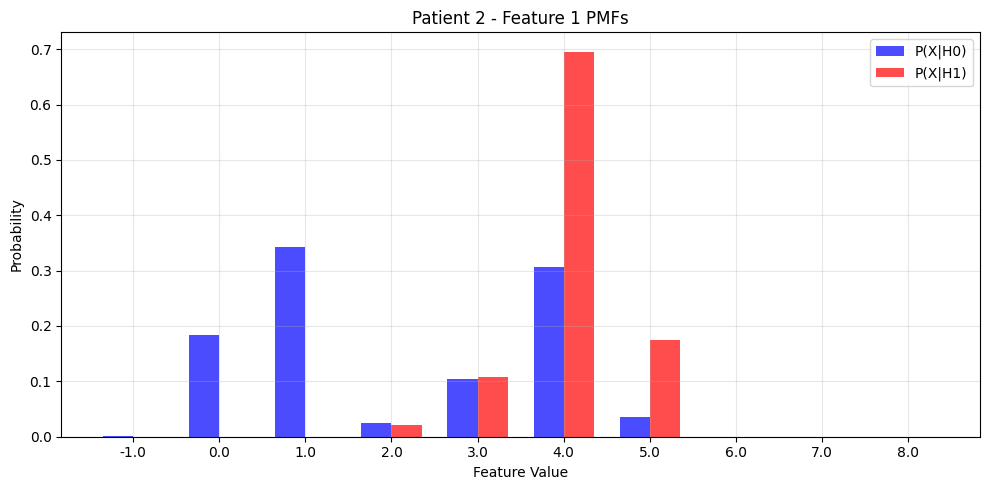

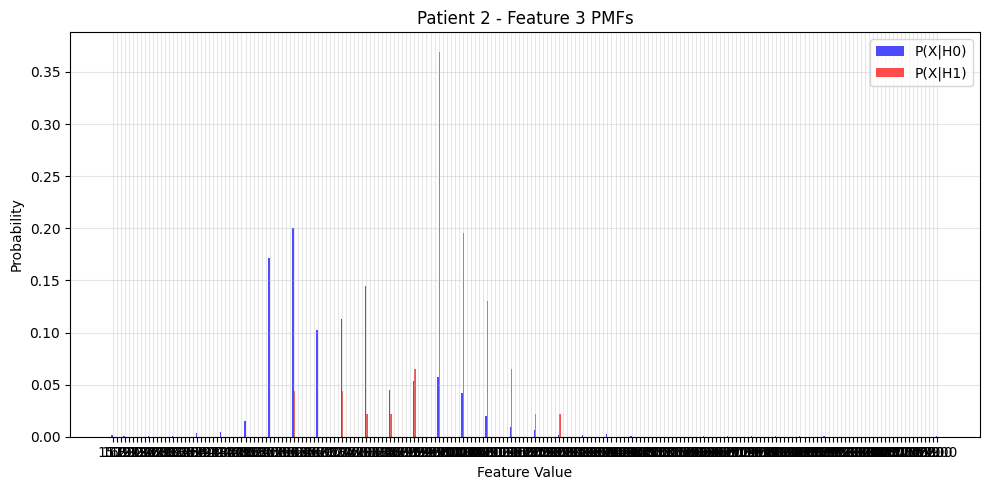

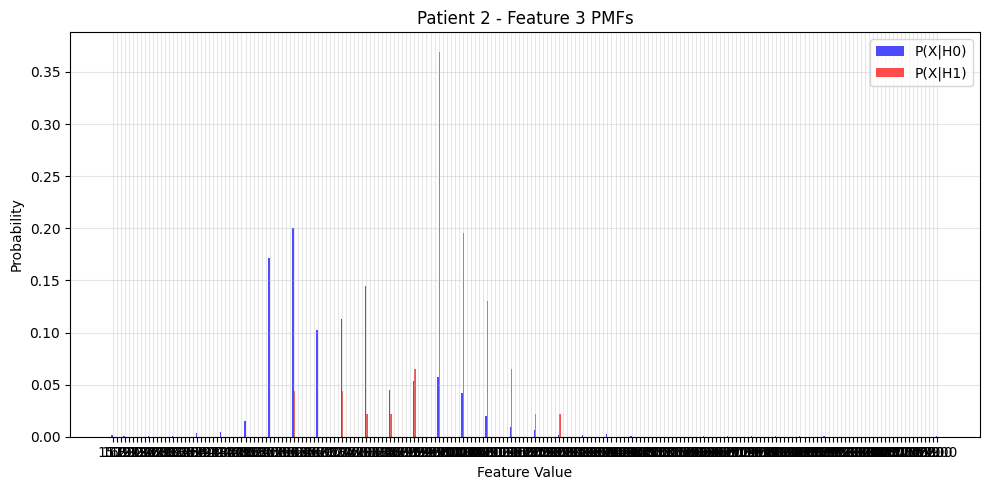

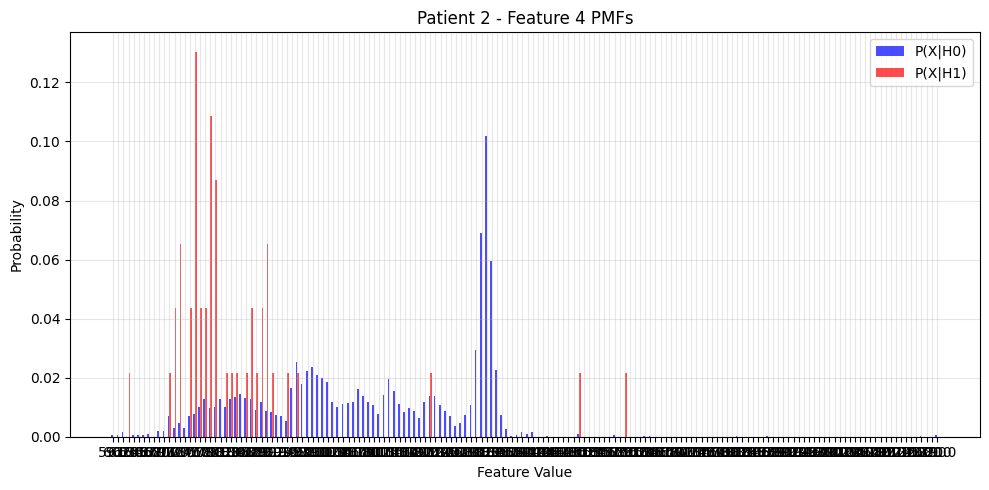

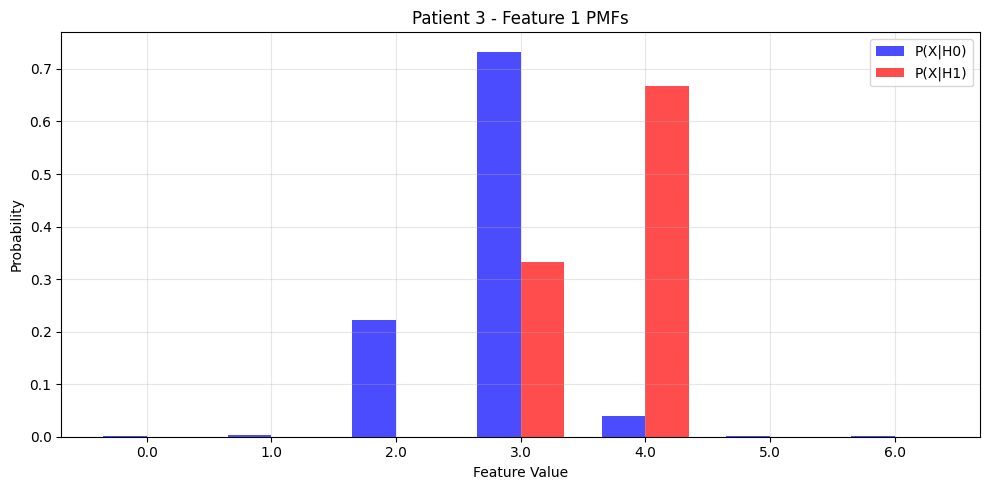

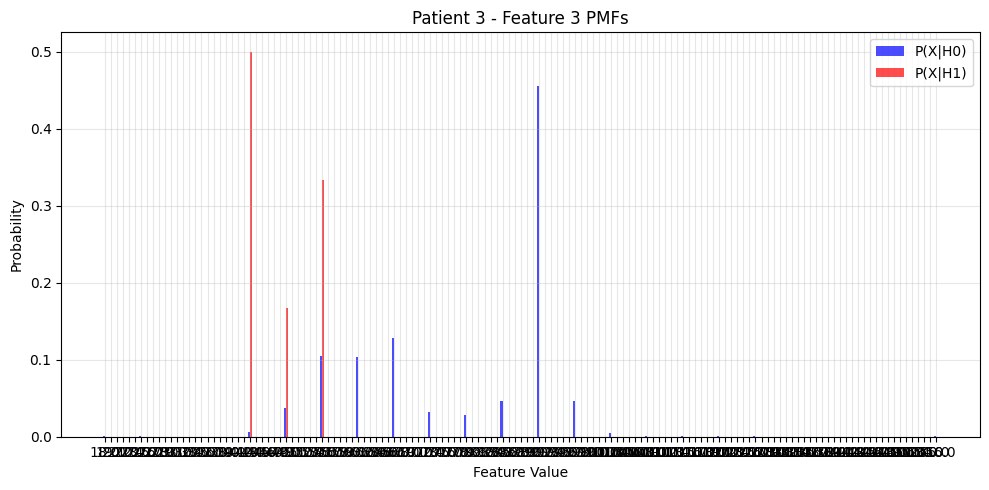

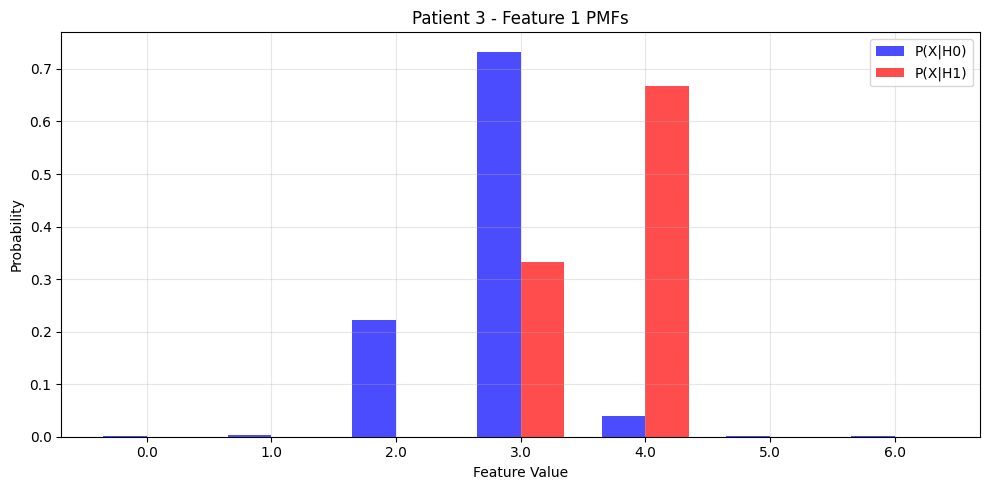

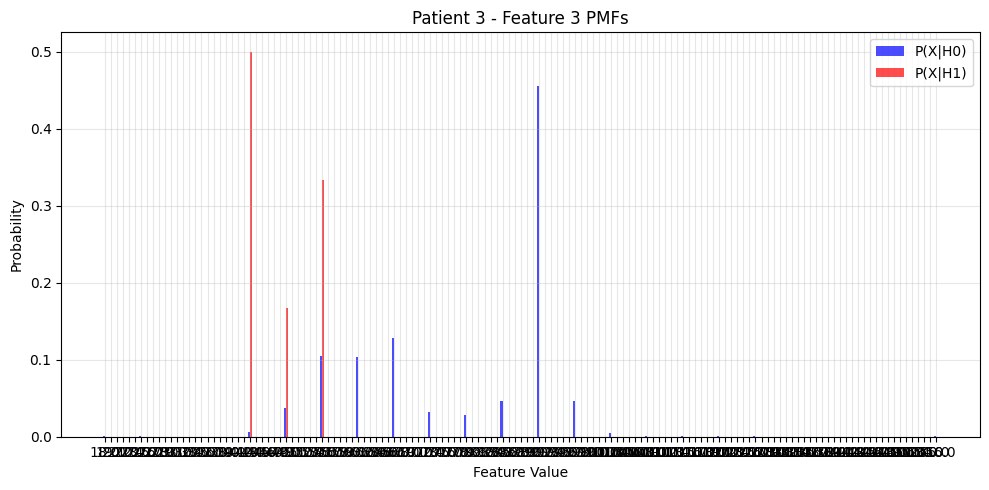

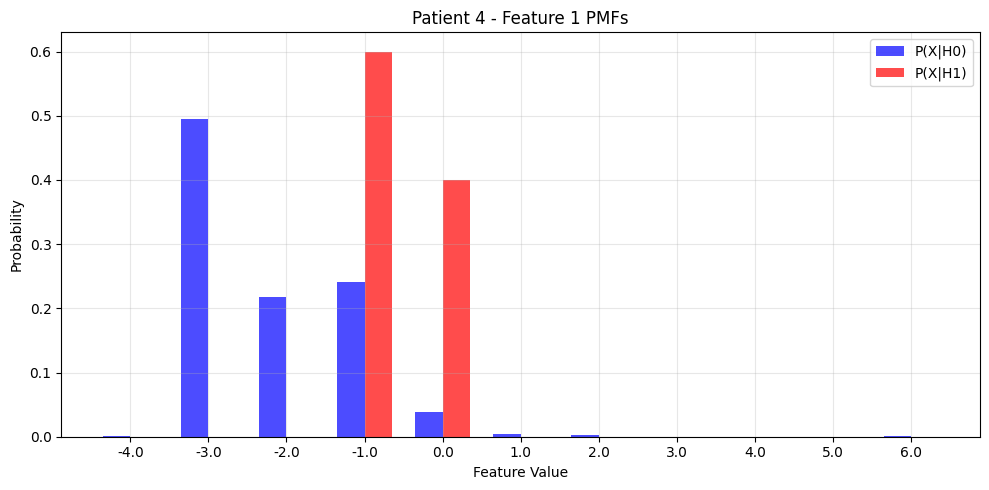

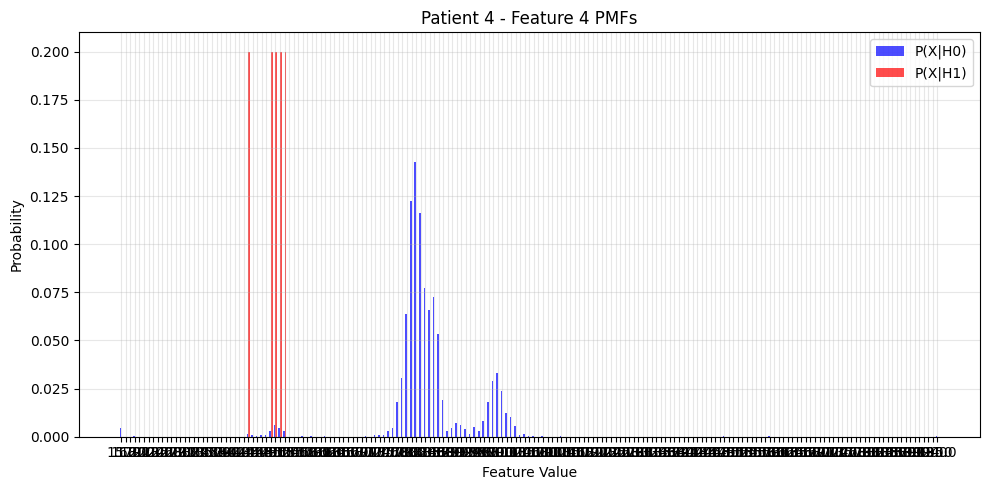

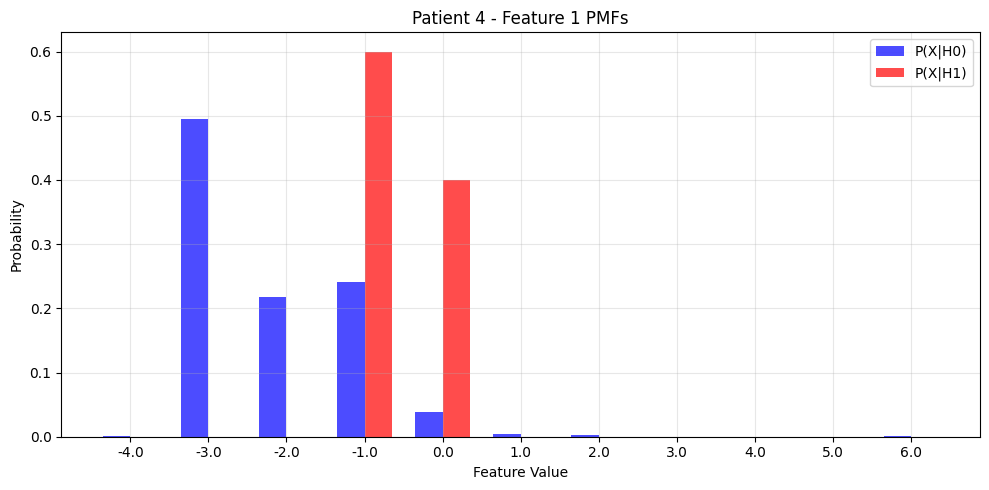

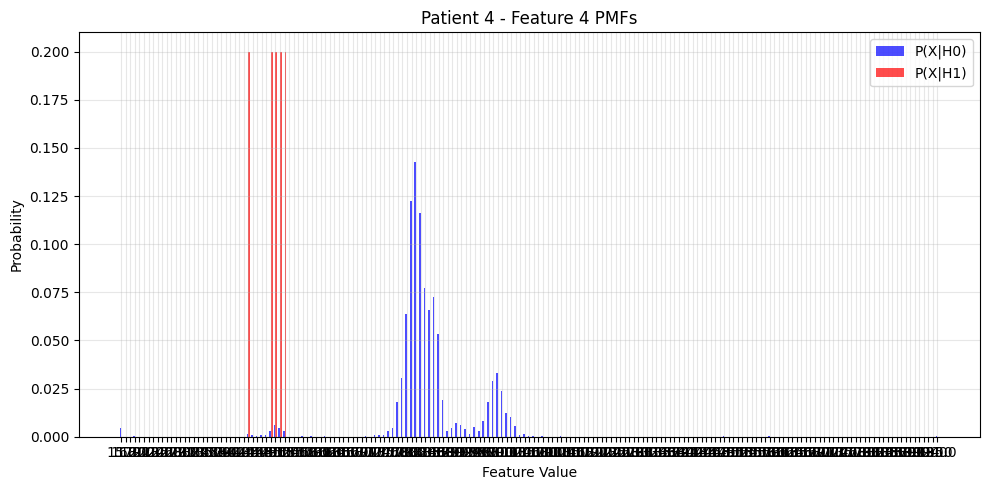

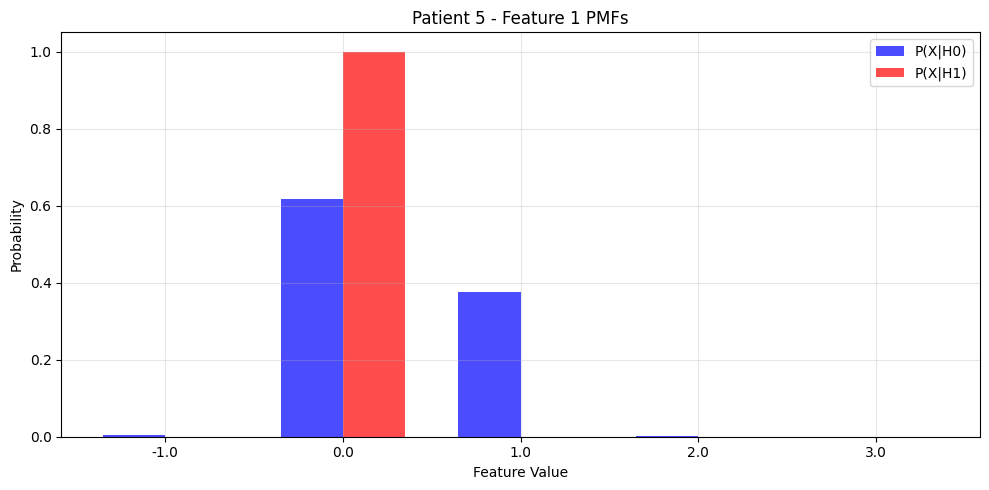

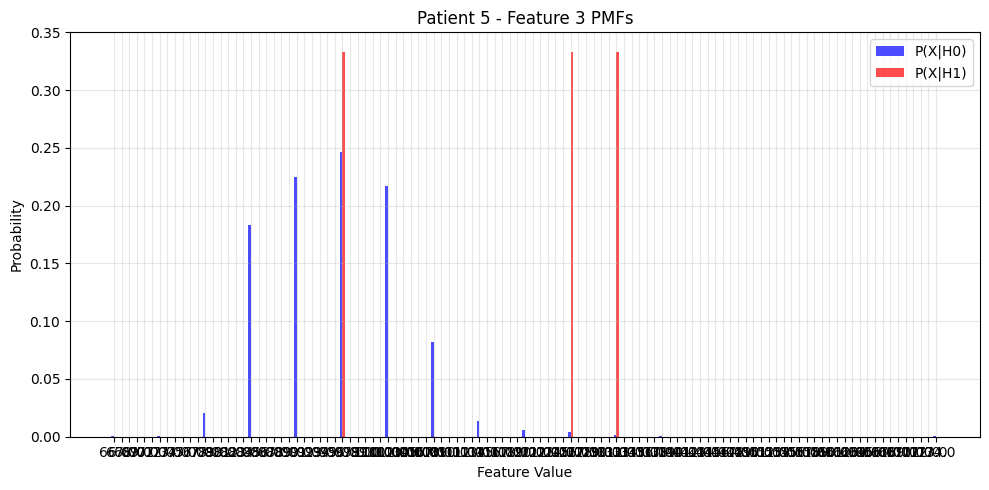

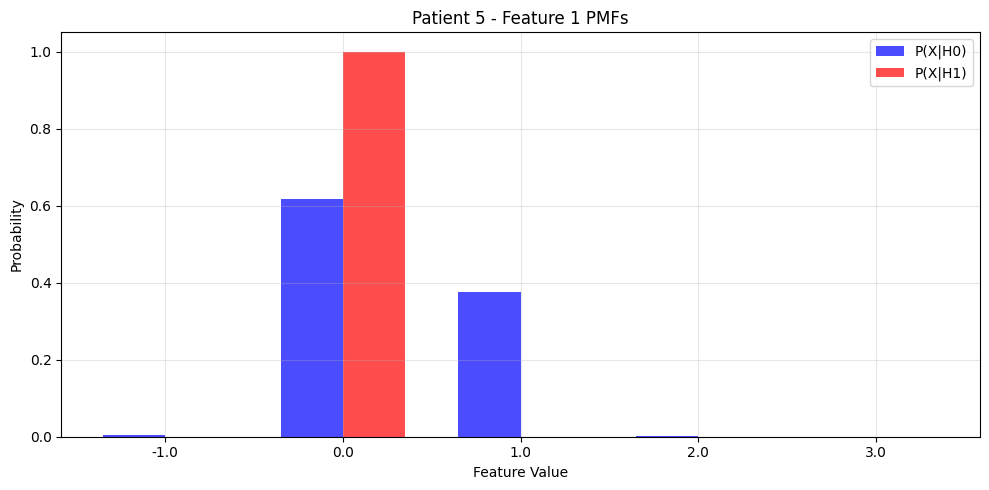

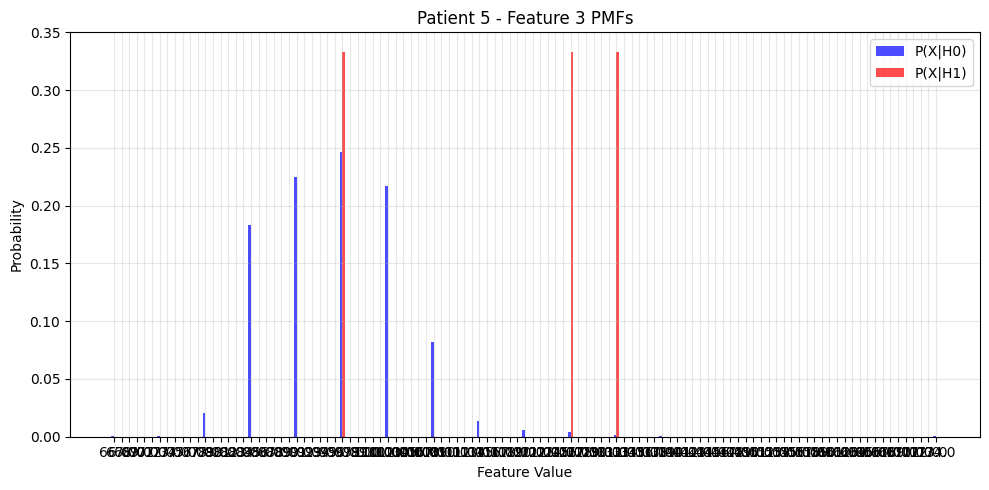

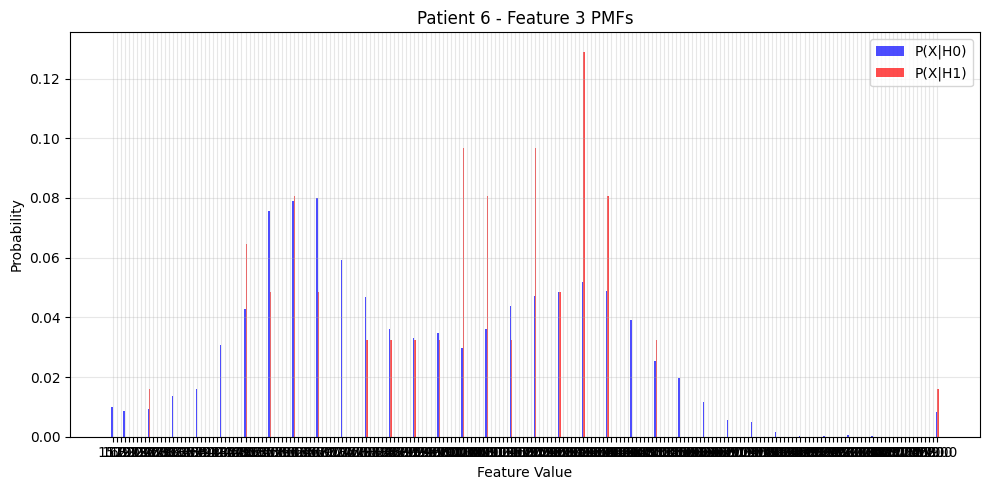

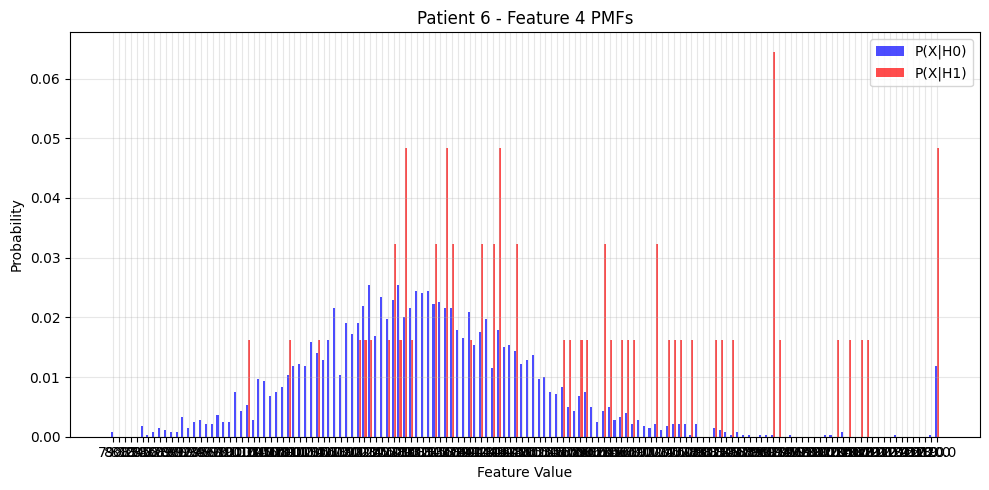

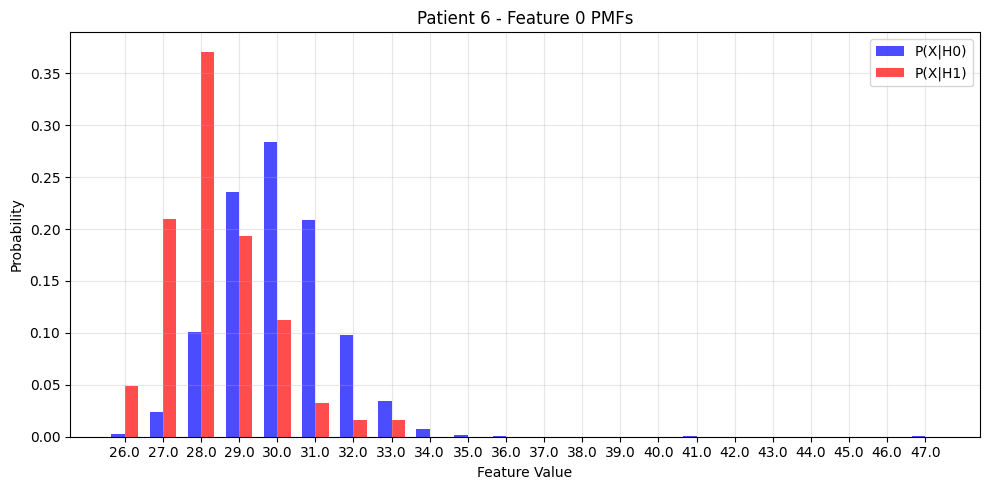

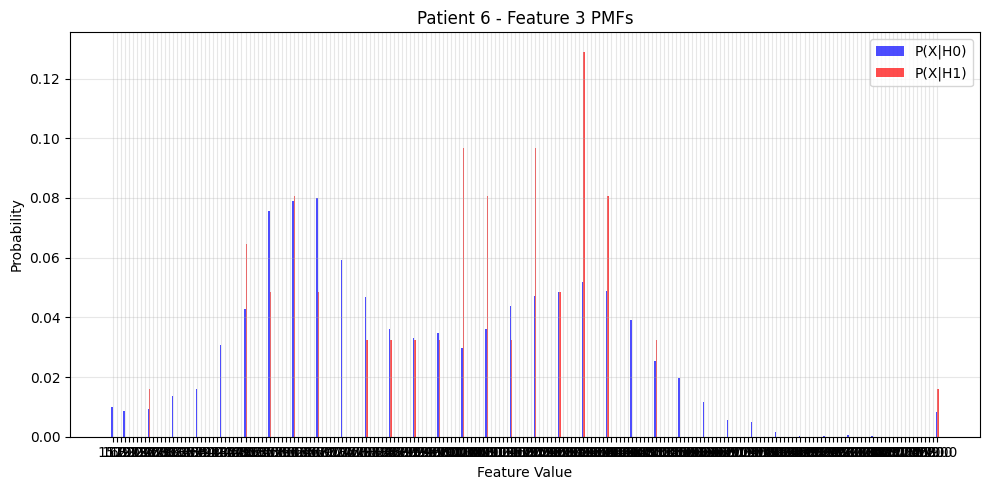

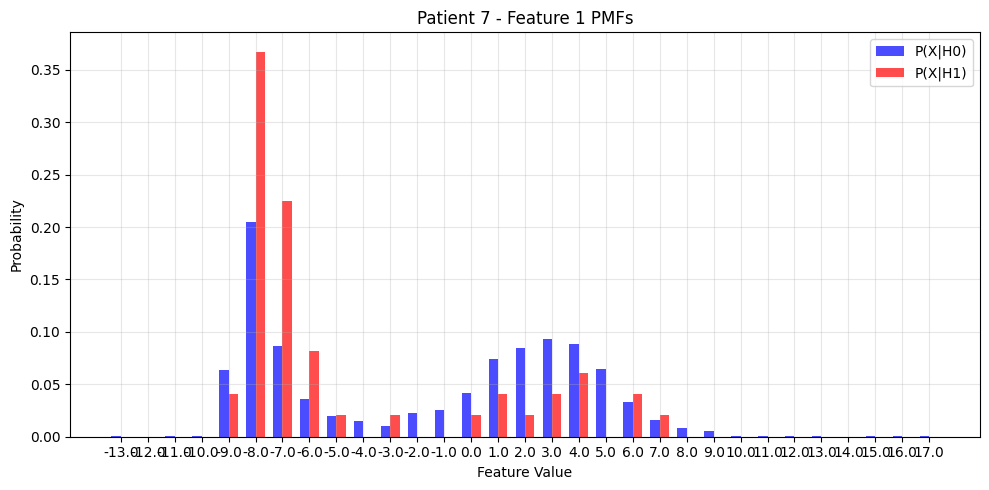

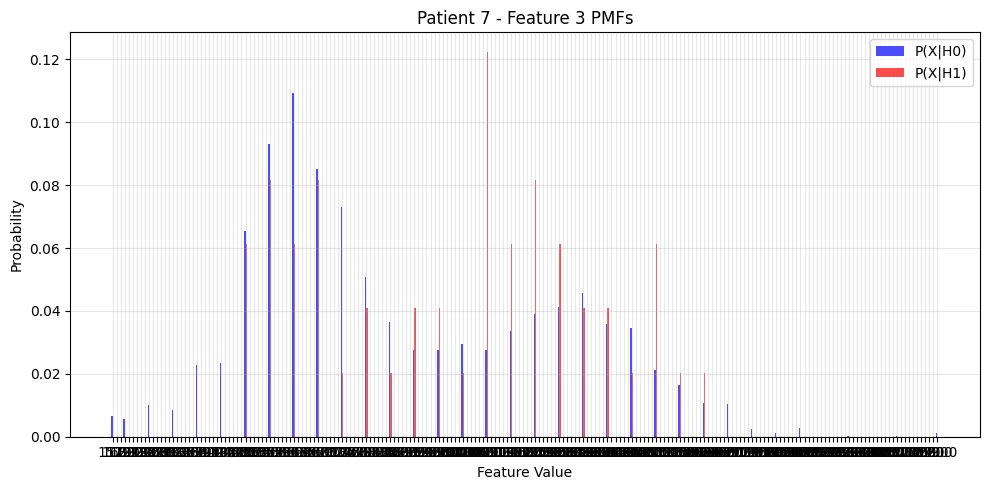

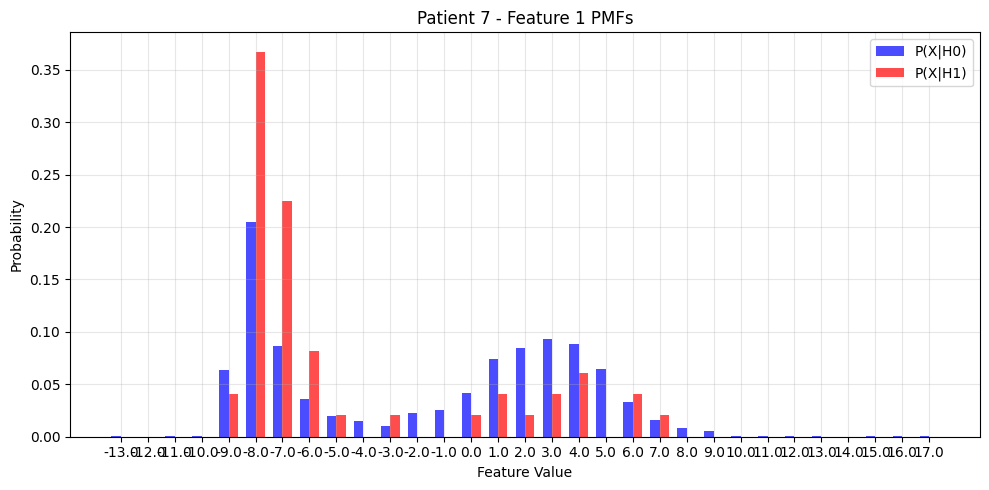

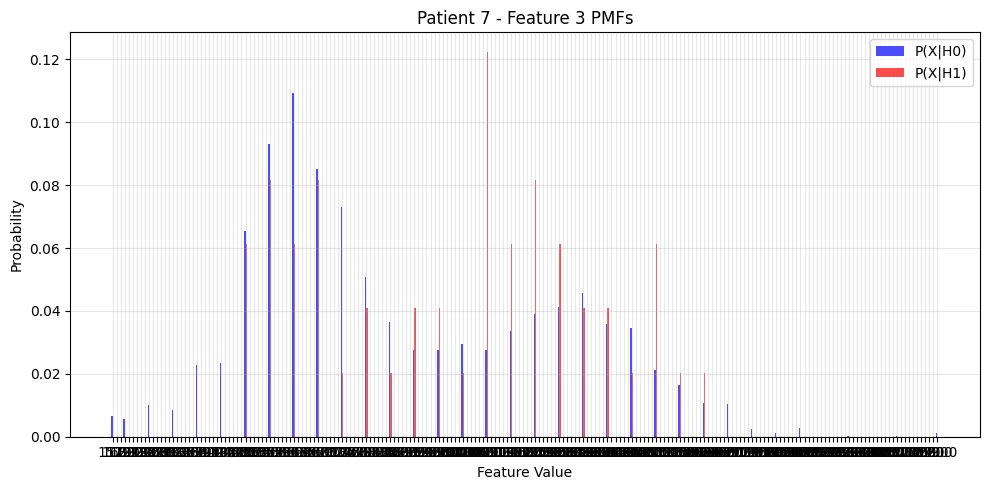

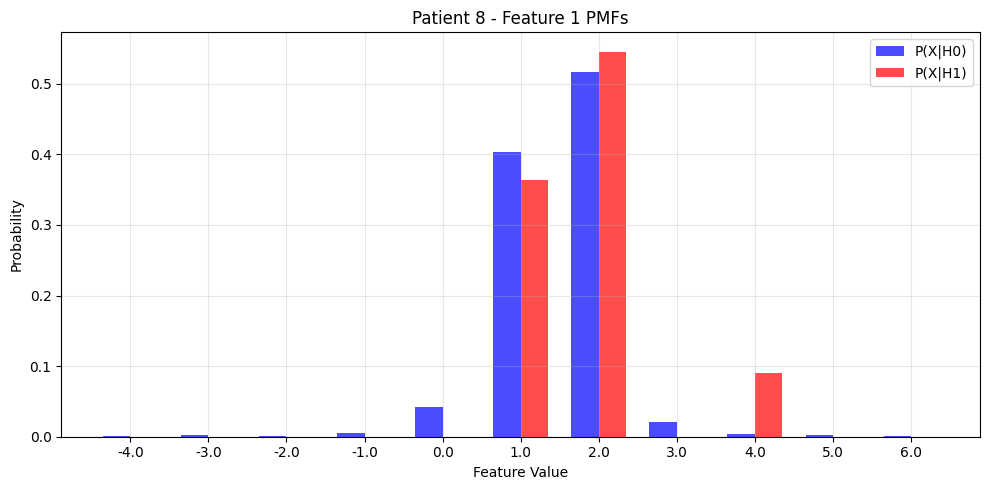

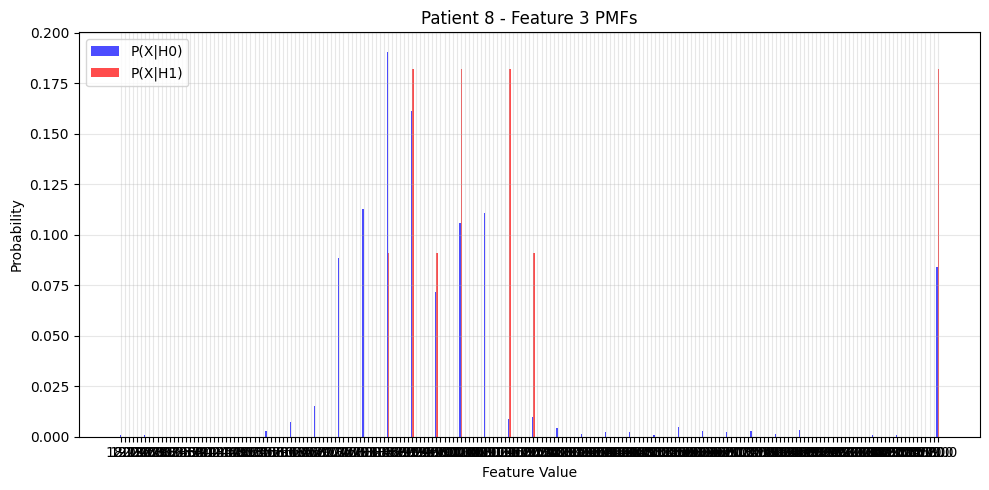

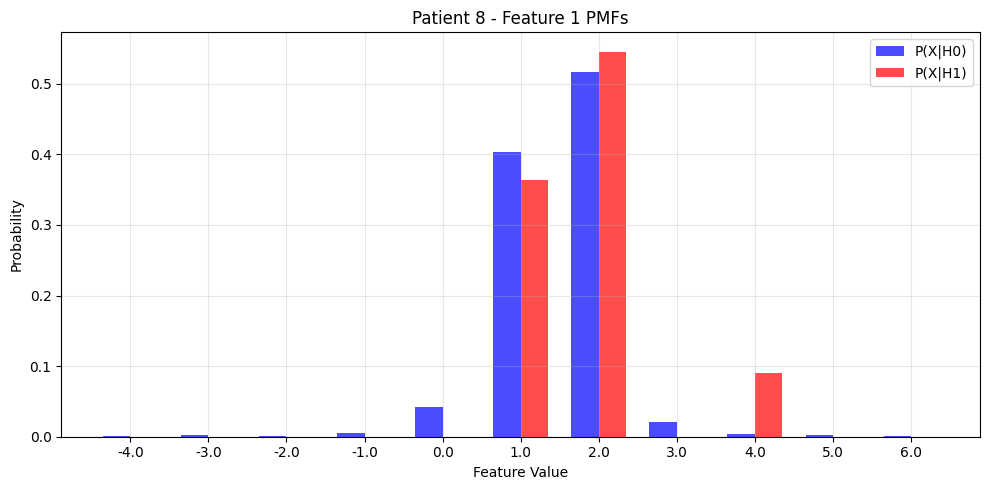

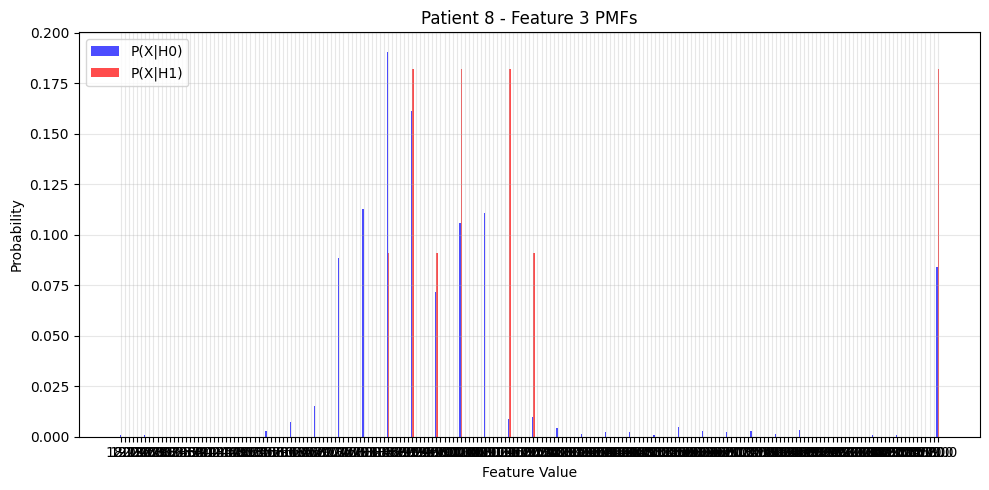

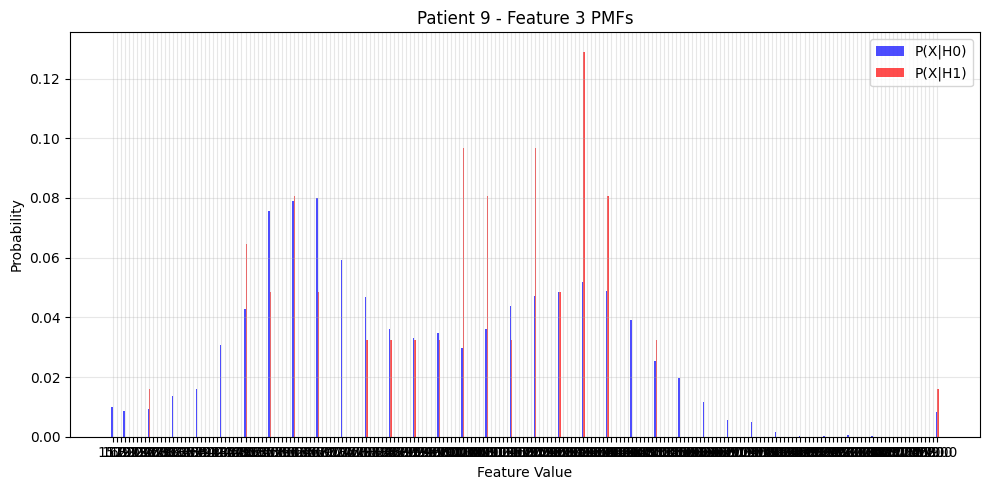

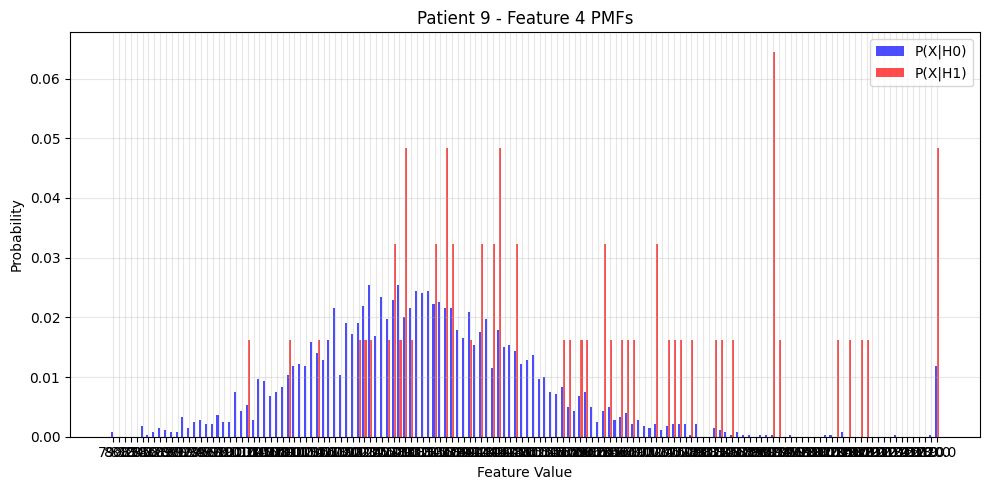

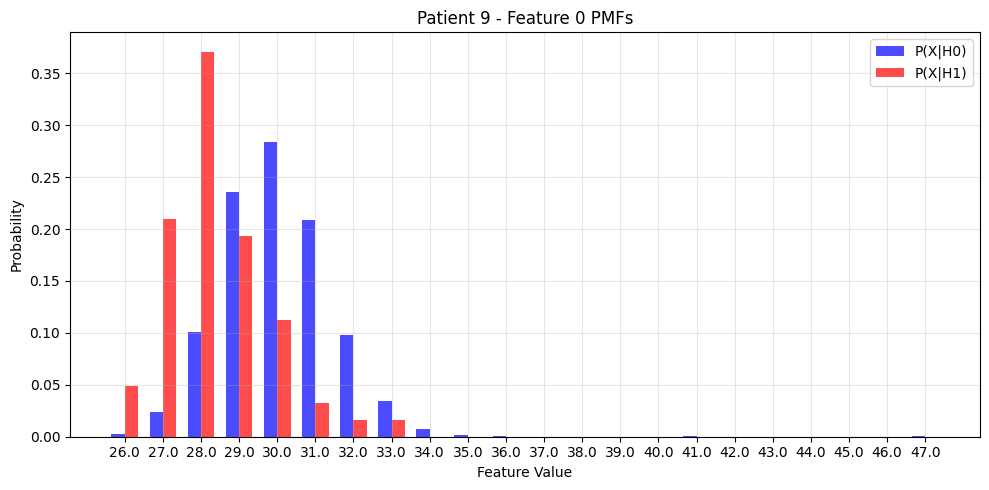

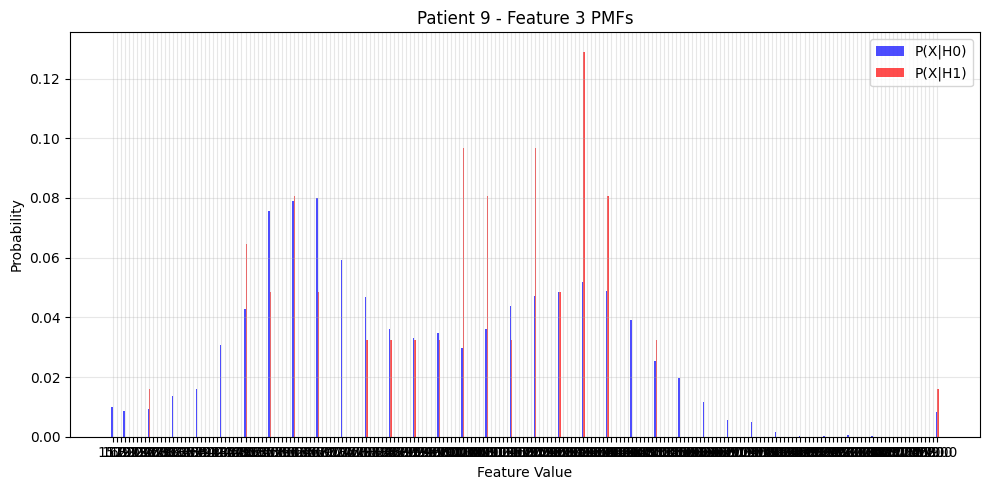

Selected feature pairs for next task:
Features 0 & 1
Features 3 & 4
Features 0 & 3
Features 1 & 4
Features 1 & 3


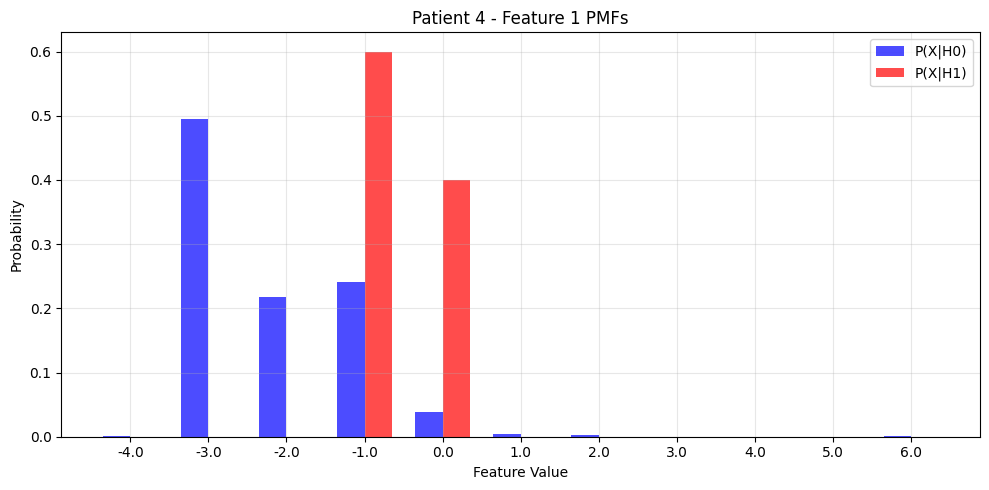

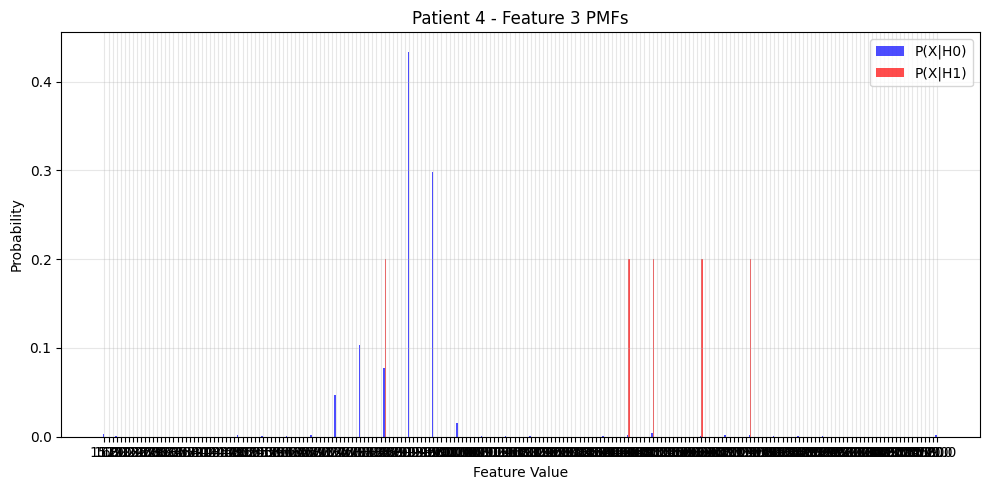

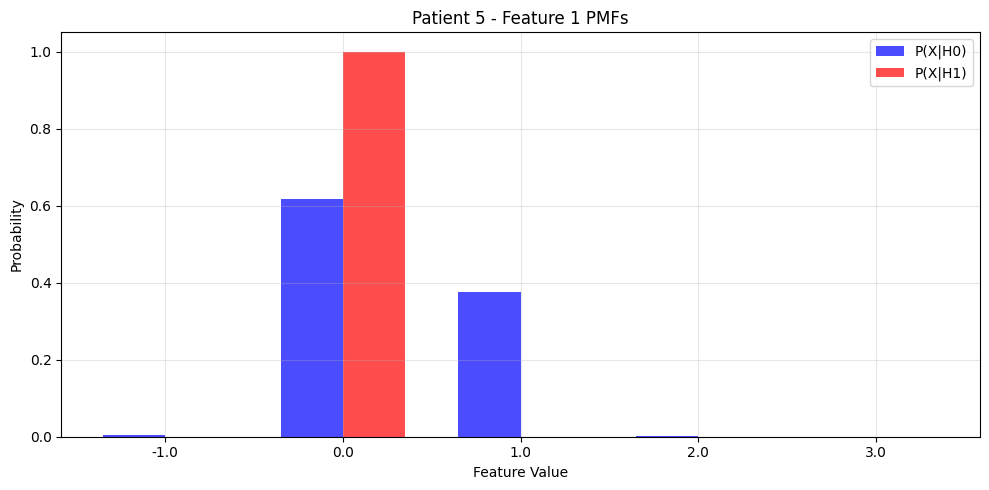

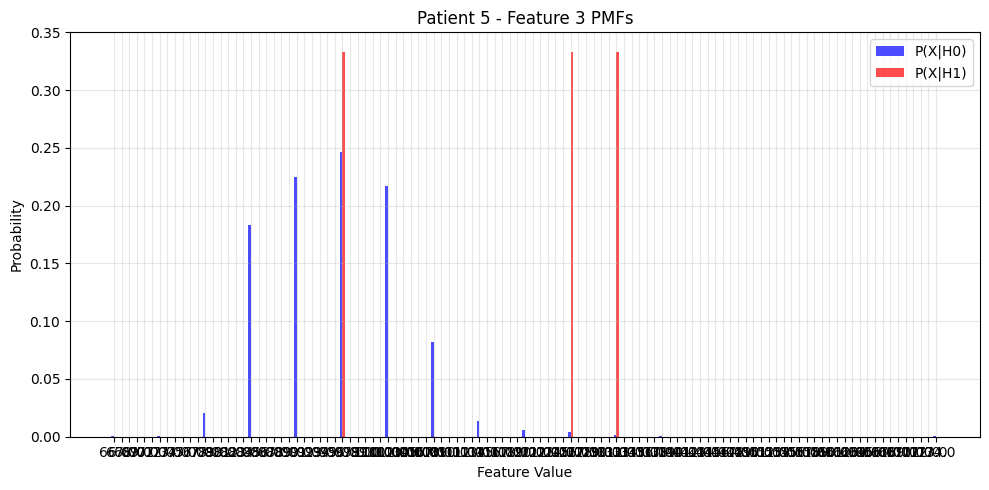

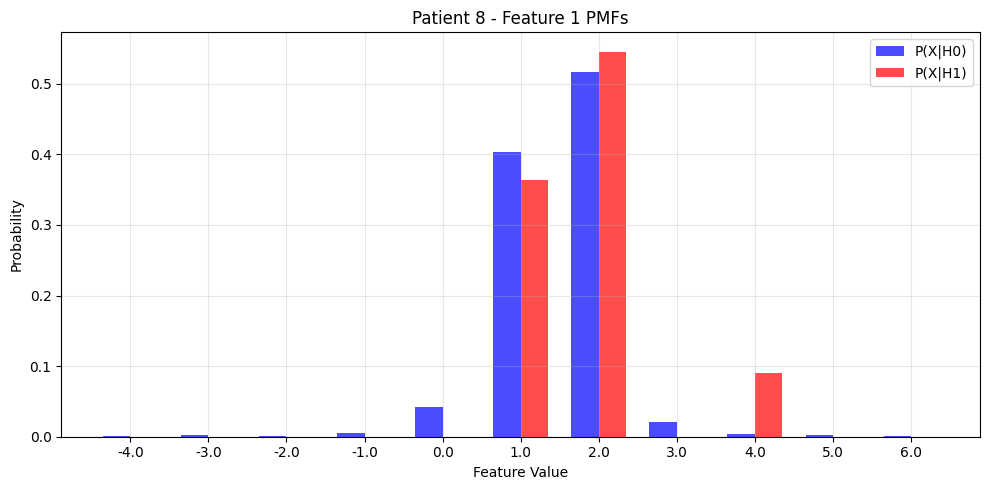

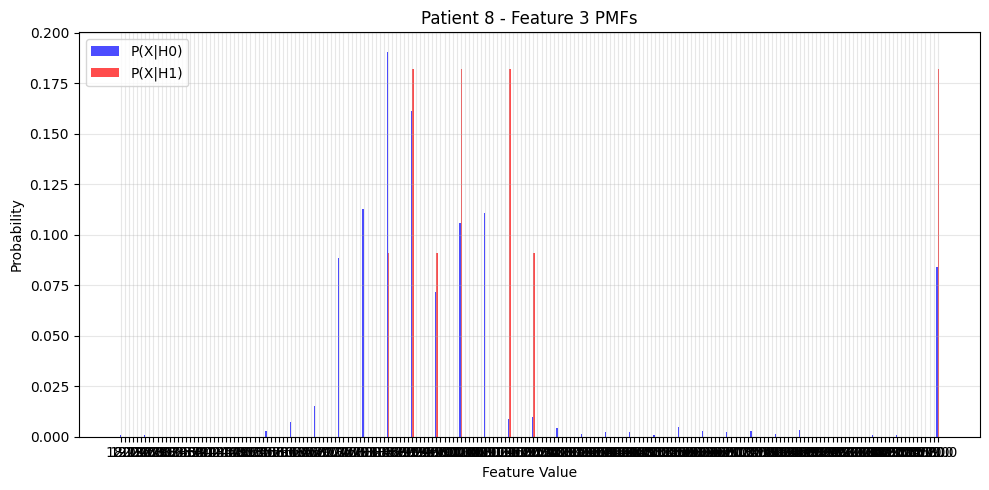

Patient 4 Top ML Features: [6, 4, 3]
Patient 5 Top ML Features: [3, 0, 1]
Patient 8 Top ML Features: [1, 2, 3]
Correlation Matrix:
 [[ 1.         -0.2787263   0.26293107]
 [-0.2787263   1.          0.52766829]
 [ 0.26293107  0.52766829  1.        ]]
Best ML Pair Patient 4: (4, 3), Correlation: 0.263
Best ML Pair Patient 5: (3, 0), Correlation: 0.263
Best ML Pair Patient 8: (1, 3), Correlation: 0.263
ML Errors for Features (1, 3):
Feature 1: 0.034
Feature 3: 0.268
Correlation: 0.263
Best Pairs:
Patient 1:
  ML Pair: Features [3, 5], Correlation: 0.124
  MAP Pair: Features [4, 1], Correlation: 0.196
Patient 2:
  ML Pair: Features [6, 3], Correlation: 0.509
  MAP Pair: Features [1, 3], Correlation: 0.460
Patient 3:
  ML Pair: Features [5, 3], Correlation: 0.269
  MAP Pair: Features [1, 2], Correlation: 0.395
Patient 4:
  ML Pair: Features [5, 4], Correlation: 0.027
  MAP Pair: Features [1, 3], Correlation: 0.211
Patient 5:
  ML Pair: Features [4, 1], Correlation: 0.059
  MAP Pair: Feature

In [ ]:
from itertools import combinations

# List of feature indices (0-6)
features = list(range(7))
feature_pairs = list(combinations(features, 2))
print(f"Total feature pairs: {len(feature_pairs)}")

def evaluate_feature_pair(patient_idx, feature_pair, data, labels):
    """Evaluate a feature pair's performance for a patient"""
    # Get prior probabilities
    train_labels = arr_train_labels[patient_idx]
    P_H1 = np.mean(train_labels == 1)
    P_H0 = 1 - P_H1

    # Initialize counters
    ml_errors = 0
    map_errors = 0
    total_samples = len(labels)

    for t in range(total_samples):
        # Get feature values
        f1, f2 = feature_pair
        val1 = data[f1, t]
        val2 = data[f2, t]

        # Get probabilities from HT_table_array
        table1 = HT_table_array[patient_idx][f1]
        table2 = HT_table_array[patient_idx][f2]

        # Find closest values
        idx1 = np.argmin(np.abs(table1[:, 0] - val1))
        idx2 = np.argmin(np.abs(table2[:, 0] - val2))

        # Joint probabilities (assuming independence)
        P_X_H0 = table1[idx1, 1] * table2[idx2, 1]
        P_X_H1 = table1[idx1, 2] * table2[idx2, 2]

        # ML Decision
        ml_decision = 1 if P_X_H1 >= P_X_H0 else 0

        # MAP Decision
        map_decision = 1 if (P_X_H1 * P_H1) >= (P_X_H0 * P_H0) else 0

        # Count errors
        true_label = labels[t]
        ml_errors += (ml_decision != true_label)
        map_errors += (map_decision != true_label)

    return ml_errors/total_samples, map_errors/total_samples

# Evaluate all pairs for a patient
def find_best_pairs(patient_idx):
    """Find best ML and MAP pairs for a patient"""
    best_ml = {'pair': None, 'error': 1.0}
    best_map = {'pair': None, 'error': 1.0}

    for pair in feature_pairs:
        ml_err, map_err = evaluate_feature_pair(
            patient_idx, pair,
            arr_train_data[patient_idx],
            arr_train_labels[patient_idx]
        )

        if ml_err < best_ml['error']:
            best_ml = {'pair': pair, 'error': ml_err}
        if map_err < best_map['error']:
            best_map = {'pair': pair, 'error': map_err}

    return best_ml, best_map

best_ml_p1, best_map_p1 = find_best_pairs(0)
best_ml_p2, best_map_p2 = find_best_pairs(1)
best_ml_p3, best_map_p3 = find_best_pairs(2)
best_ml_p4, best_map_p4 = find_best_pairs(3)
best_ml_p5, best_map_p5 = find_best_pairs(4)
best_ml_p6, best_map_p6 = find_best_pairs(5)
best_ml_p7, best_map_p7 = find_best_pairs(6)
best_ml_p8, best_map_p8 = find_best_pairs(7)
best_ml_p9, best_map_p9 = find_best_pairs(8)

print(f"\nPatient 1 Best ML Pair: Features {best_ml_p1['pair']} (Error: {best_ml_p1['error']:.4f})")
print(f"Patient 1 Best MAP Pair: Features {best_map_p1['pair']} (Error: {best_map_p1['error']:.4f})")

print(f"\nPatient 2 Best ML Pair: Features {best_ml_p2['pair']} (Error: {best_ml_p2['error']:.4f})")
print(f"Patient 2 Best MAP Pair: Features {best_map_p2['pair']} (Error: {best_map_p2['error']:.4f})")

print(f"\nPatient 3 Best ML Pair: Features {best_ml_p3['pair']} (Error: {best_ml_p3['error']:.4f})")
print(f"Patient 3 Best MAP Pair: Features {best_map_p3['pair']} (Error: {best_map_p3['error']:.4f})")

print(f"\nPatient 4 Best ML Pair: Features {best_ml_p4['pair']} (Error: {best_ml_p4['error']:.4f})")
print(f"Patient 4 Best MAP Pair: Features {best_map_p4['pair']} (Error: {best_map_p4['error']:.4f})")

print(f"\nPatient 5 Best ML Pair: Features {best_ml_p5['pair']} (Error: {best_ml_p5['error']:.4f})")
print(f"Patient 5 Best MAP Pair: Features {best_map_p5['pair']} (Error: {best_map_p5['error']:.4f})")

print(f"\nPatient 6 Best ML Pair: Features {best_ml_p6['pair']} (Error: {best_ml_p6['error']:.4f})")
print(f"Patient 6 Best MAP Pair: Features {best_map_p6['pair']} (Error: {best_map_p6['error']:.4f})")

print(f"\nPatient 7 Best ML Pair: Features {best_ml_p7['pair']} (Error: {best_ml_p7['error']:.4f})")
print(f"Patient 7 Best MAP Pair: Features {best_map_p7['pair']} (Error: {best_map_p7['error']:.4f})")

print(f"\nPatient 8 Best ML Pair: Features {best_ml_p8['pair']} (Error: {best_ml_p8['error']:.4f})")
print(f"Patient 8 Best MAP Pair: Features {best_map_p8['pair']} (Error: {best_map_p8['error']:.4f})")

print(f"\nPatient 9 Best ML Pair: Features {best_ml_p9['pair']} (Error: {best_ml_p9['error']:.4f})")
print(f"Patient 9 Best MAP Pair: Features {best_map_p9['pair']} (Error: {best_map_p9['error']:.4f})")

import matplotlib.pyplot as plt
def plot_feature_pmfs(patient_idx, feature_idx):
    """Plot conditional PMFs for a specific patient and feature"""
    plt.figure(figsize=(10, 5))

    # Get data from HT_table_array
    feature_table = HT_table_array[patient_idx][feature_idx]
    values = feature_table[:, 0]
    p_x_h0 = feature_table[:, 1]
    p_x_h1 = feature_table[:, 2]

    # Plot settings
    bar_width = 0.35
    opacity = 0.7
    index = np.arange(len(values))

    # Plot bars
    plt.bar(index - bar_width/2, p_x_h0, bar_width,
            alpha=opacity, color='b', label='P(X|H0)')
    plt.bar(index + bar_width/2, p_x_h1, bar_width,
            alpha=opacity, color='r', label='P(X|H1)')

    # Formatting
    plt.xlabel('Feature Value')
    plt.ylabel('Probability')
    plt.title(f'Patient {patient_idx+1} - Feature {feature_idx+1} PMFs')
    plt.xticks(index, values)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

selected_patients = [0,1,2,3,4,5,6,7,8]  # 0-based indices
best_pairs = {}

for p in selected_patients:
    ml_pair, map_pair = find_best_pairs(p)
    best_pairs[p] = {  # Convert to 1-based indexing
        'ML': (ml_pair['pair'], ml_pair['error']),
        'MAP': (map_pair['pair'], map_pair['error'])
    }
    # Plot feature PMFs for justification
    for feat in ml_pair['pair']:
        plot_feature_pmfs(p, (feat-1))
    for feat in map_pair['pair']:
        plot_feature_pmfs(p, (feat-1))

# Collect all unique best-performing pairs
final_pairs = set()
for p in best_pairs.values():
    final_pairs.add(p['ML'][0])
    final_pairs.add(p['MAP'][0])

print("Selected feature pairs for next task:")
for pair in final_pairs:
    print(f"Features {pair[0]} & {pair[1]}")

# For Patient 8's best pair (Features 2 & 5)
plot_feature_pmfs(3, 0)  # Show clear H0/H1 separation
plot_feature_pmfs(3, 2)  # Show different separation pattern
plot_feature_pmfs(4, 0)  # Show clear H0/H1 separation
plot_feature_pmfs(4, 2)
plot_feature_pmfs(7, 0)  # Show clear H0/H1 separation
plot_feature_pmfs(7, 2)
# Together they provide complementary information

def get_top_features(patient_idx, rule='ML', k=3):
    """Return top k features for a patient based on ML/MAP error."""
    errors = []
    for f in range(7):
        if rule == 'ML':
            error = Error_table_array[patient_idx][f][0, 2]  # ML error
        else:
            error = Error_table_array[patient_idx][f][1, 2]  # MAP error
        errors.append((f, error))
    # Sort by error ascending and return top k features
    return [f for f, _ in sorted(errors, key=lambda x: x[1])[:k]]

# Example: Get top 3 ML features for Patient 8
top_ml_p4 = get_top_features(3, 'ML', 3)
top_ml_p5 = get_top_features(4, 'ML', 3)
top_ml_p8 = get_top_features(7, 'ML', 3)
print(f"Patient 4 Top ML Features: {top_ml_p4}")
print(f"Patient 5 Top ML Features: {top_ml_p5}")
print(f"Patient 8 Top ML Features: {top_ml_p8}")

def analyze_correlations(patient_idx, features):
    """Return correlation matrix for specified features."""
    data = arr_train_data[patient_idx][features, :]
    return np.corrcoef(data)

# Example: Analyze correlations for Patient 8's top ML features
corr_matrix = analyze_correlations(7, top_ml_p8)
print("Correlation Matrix:\n", corr_matrix)

from itertools import combinations

def select_best_pair(patient_idx, rule='ML', k=3):
    """Select best feature pair for a rule using top k features."""
    top_features = get_top_features(patient_idx, rule, k)
    pairs = list(combinations(top_features, 2))

    best_pair = None
    min_corr = float('inf')
    for f1, f2 in pairs:
        corr = np.abs(np.corrcoef(
            arr_train_data[patient_idx][f1],
            arr_train_data[patient_idx][f2]
        )[0, 1])
        if corr < min_corr:
            min_corr = corr
            best_pair = (f1, f2)
    return best_pair, min_corr

# Example: Best ML pair for Patient 8
best_ml_pair_p4, corr = select_best_pair(3, 'ML')
best_ml_pair_p5, corr = select_best_pair(4, 'ML')
best_ml_pair_p8, corr = select_best_pair(7, 'ML')
print(f"Best ML Pair Patient 4: {best_ml_pair_p4}, Correlation: {corr:.3f}")
print(f"Best ML Pair Patient 5: {best_ml_pair_p5}, Correlation: {corr:.3f}")
print(f"Best ML Pair Patient 8: {best_ml_pair_p8}, Correlation: {corr:.3f}")

# Print metrics
print(f"ML Errors for Features {best_ml_pair_p8}:")
print(f"Feature {best_ml_pair_p8[0]}: {Error_table_array[7][best_ml_pair_p8[0]][0, 2]:.3f}")
print(f"Feature {best_ml_pair_p8[1]}: {Error_table_array[7][best_ml_pair_p8[1]][0, 2]:.3f}")
print(f"Correlation: {corr:.3f}")

# Select best pairs for 3 patients (e.g., Patients 3, 5, 8)
selected_patients = [0,1,2,3,4,5,6,7,8]  # 0-based indices
best_pairs = {}

for p in selected_patients:
    # ML rule pair
    ml_pair, ml_corr = select_best_pair(p, 'ML')
    # MAP rule pair
    map_pair, map_corr = select_best_pair(p, 'MAP')

    best_pairs[p+1] = {
        'ML': (ml_pair, ml_corr),
        'MAP': (map_pair, map_corr)
    }

print("Best Pairs:")
for p in best_pairs:
    print(f"Patient {p}:")
    print(f"  ML Pair: Features {[x+1 for x in best_pairs[p]['ML'][0]]}, Correlation: {best_pairs[p]['ML'][1]:.3f}")
    print(f"  MAP Pair: Features {[x+1 for x in best_pairs[p]['MAP'][0]]}, Correlation: {best_pairs[p]['MAP'][1]:.3f}")
